# Data Science Nigeria Kaggle Pre-Qualification Competition 2019 - By Aminah Mardiyyah Rufai


# PERSONAL DETAILS
#### Full name: Aminah Mardiyyah Rufai
#### Kaggle ID (profile name on the leaderboard): Mardiyyah
#### Student status: Graduated
#### Gender: Female
#### Special services (e.g. Nigeria Police, AI+ Club campus ambassadors): AI+ community member
#### Member ID: DSN/AIPLUS/2019/ 0098
#### Name of School/Place of work/Organisation or none: University of Lagos/ Brainiacs STEM and Robotics

In [1]:
#Importing libaries to be used
#Linear Algebra
import numpy as np

#Data preprocessing
import pandas as pd

#Pandas-Profiling for easy profling and analysis of Dataset
import pandas_profiling as pp

#Data splitting into train/test
from sklearn.model_selection import train_test_split

#Catboost Classifier Algorithm
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import classification_report

#Other Classification Algorithms to work with:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#Matplotlib plotting and Jupyter magiclink for better visualization
from matplotlib import pyplot as plt
%matplotlib inline

#Advance plotting visualization
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')

#Ignore annoying warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

#setting display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', 400)
np.set_printoptions(linewidth =500)

In [2]:
#for minimizing visualization in such way that it all appears without any been hidden

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# 1. DATA PREPROCESSING

In [4]:
#Importing both train and test datasets and passing the encoding parameter for representation/encoding of string variables
train = pd.read_csv('train.csv', encoding = 'utf-8')
test = pd.read_csv('test.csv', encoding ='utf-8')

In [5]:
train.head().transpose()
#the transpose function is to reverse the table in such a way that it appears column by row and not row by column.
#this is very useful when the number of columns are much, so you could easily see all 
#the columns available in the dataset

,0,1,2,3,4
EmployeeNo,YAK/S/00001,YAK/S/00002,YAK/S/00003,YAK/S/00004,YAK/S/00006
Division,Commercial Sales and Marketing,Customer Support and Field Operations,Commercial Sales and Marketing,Commercial Sales and Marketing,Information and Strategy
Qualification,"MSc, MBA and PhD",First Degree or HND,First Degree or HND,First Degree or HND,First Degree or HND
Gender,Female,Male,Male,Male,Male
Channel_of_Recruitment,Direct Internal process,Agency and others,Direct Internal process,Agency and others,Direct Internal process
Trainings_Attended,2,2,2,3,3
Year_of_birth,1986,1991,1987,1982,1990
Last_performance_score,12.5,12.5,7.5,2.5,7.5
Year_of_recruitment,2011,2015,2012,2009,2012
Targets_met,1,0,0,0,0


In [6]:
test.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00005,YAK/S/00011,YAK/S/00015,YAK/S/00016,YAK/S/00017
Division,Information Technology and Solution Support,Information Technology and Solution Support,Research and Innovation,Customer Support and Field Operations,Information Technology and Solution Support
Qualification,First Degree or HND,NaN,"MSc, MBA and PhD",First Degree or HND,First Degree or HND
Gender,Male,Male,Male,Male,Male
Channel_of_Recruitment,Agency and others,Direct Internal process,Direct Internal process,Agency and others,Agency and others
Trainings_Attended,2,2,2,2,2
Year_of_birth,1976,1991,1984,1984,1983
Last_performance_score,7.5,0,7.5,2.5,7.5
Year_of_recruitment,2017,2018,2012,2009,2014
Targets_met,0,0,0,0,1


In [7]:
#viewing the shape of the train set
train.shape

(38312, 19)

In [8]:
#viewing the shape of the test set
test.shape

(16496, 18)

In [9]:
#this library was importing earlier as Pandas Profiling. It aids efficient analysis of the datasets
#You can get a full profile report on how the data looks like, including details on missing values 
#and correlation of numerical variables
#You can run this both on the train and test set if you wish
#it also provides some plots 
pp.ProfileReport(train)

Number of variables,19
Number of observations,38312
Total Missing (%),0.2%
Total size in memory,5.6 MiB
Average record size in memory,152.0 B
Numeric,5
Categorical,10
Boolean,3
Date,0
Text (Unique),1
Rejected,0


In [10]:
#Changing the capitalization of the entries in the state of origin column for both train and test sets
train['State_Of_Origin'] = train.State_Of_Origin.str.title()
test['State_Of_Origin'] = test.State_Of_Origin.str.title()

In [11]:
#checking for unique entries in the state of origin column
train['State_Of_Origin'].unique()

array(['Anambra', 'Katsina', 'Niger', 'Akwa Ibom', 'Enugu', 'Oyo', 'Lagos', 'Ondo', 'Kwara', 'Edo', 'Bauchi', 'Taraba', 'Rivers', 'Kaduna', 'Plateau', 'Ekiti', 'Borno', 'Imo', 'Cross River', 'Kano', 'Fct', 'Ogun', 'Gombe', 'Delta', 'Benue', 'Zamfara', 'Osun', 'Abia', 'Kebbi', 'Adamawa', 'Nassarawa', 'Sokoto', 'Kogi', 'Jigawa', 'Bayelsa', 'Yobe', 'Ebonyi'], dtype=object)

# checking for unique entries in all the columns in the train set(which would likely correspond with that of the test set)

In [12]:
train['Division'].unique()

array(['Commercial Sales and Marketing', 'Customer Support and Field Operations', 'Information and Strategy', 'Information Technology and Solution Support', 'Sourcing and Purchasing', 'Business Finance Operations', 'People/HR Management', 'Research and Innovation', 'Regulatory and Legal services'], dtype=object)

In [13]:
train['Qualification'].unique()

array(['MSc, MBA and PhD', 'First Degree or HND', nan, 'Non-University Education'], dtype=object)

In [14]:
train['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
train['Channel_of_Recruitment'].unique()

array(['Direct Internal process', 'Agency and others', 'Referral and Special candidates'], dtype=object)

In [16]:
train['Trainings_Attended'].unique()

array([ 2,  3,  4,  5,  8,  6,  7,  9, 11, 10], dtype=int64)

In [17]:
train['Last_performance_score'].unique()

array([12.5,  7.5,  2.5, 10. ,  0. ,  5. ])

In [18]:
train['Targets_met'].unique()

array([1, 0], dtype=int64)

In [19]:
train['Previous_Award'].unique()

array([0, 1], dtype=int64)

In [20]:
train['Foreign_schooled'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
train['Marital_Status'].unique()

array(['Married', 'Single', 'Not_Sure'], dtype=object)

In [22]:
train['Past_Disciplinary_Action'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
train['No_of_previous_employers'].unique()

array(['0', '1', '4', '3', '2', 'More than 5', '5'], dtype=object)

In [24]:
train['Previous_IntraDepartmental_Movement'].unique()

array(['No', 'Yes'], dtype=object)

# 2. Filling Missing values(Qualification column for both test and train)

In [25]:
train.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [26]:
test.isnull().sum()

EmployeeNo                               0
Division                                 0
Qualification                          730
Gender                                   0
Channel_of_Recruitment                   0
Trainings_Attended                       0
Year_of_birth                            0
Last_performance_score                   0
Year_of_recruitment                      0
Targets_met                              0
Previous_Award                           0
Training_score_average                   0
State_Of_Origin                          0
Foreign_schooled                         0
Marital_Status                           0
Past_Disciplinary_Action                 0
Previous_IntraDepartmental_Movement      0
No_of_previous_employers                 0
dtype: int64

In [27]:
train['Qualification'] = train['Qualification'].replace({'First Degree or HND':'Degree Holder'})
test['Qualification'] = test['Qualification'].replace({'First Degree or HND':'Degree Holder'})
train['Qualification'] = train['Qualification'].replace({'MSc, MBA and PhD':'Additional Degree'})
test['Qualification'] = test['Qualification'].replace({'MSc, MBA and PhD':'Additional Degree'})

In [28]:
train['Qualification'].replace(np.nan, 'Unknown', inplace =True)
test['Qualification'].replace(np.nan, 'Unknown', inplace =True)

In [29]:
train['No_of_previous_employers'].unique()

array(['0', '1', '4', '3', '2', 'More than 5', '5'], dtype=object)

In [30]:
#the .replace() func is used to replace the values of entries in a column/row
#I used it here because the word 'more than 5 can mean any number above 5' and cause some issues during modelling
#6 is here. it doesnt really matter which number is chosen.
train['No_of_previous_employers']= train['No_of_previous_employers'].replace({'More than 5': '6'})
test['No_of_previous_employers']= test['No_of_previous_employers'].replace({'More than 5': '6'})

# DATA VISUALIZATION

In [31]:
#distinguishing categorical variables from numerical variables
cat_cols = ['Qualification',
            'Gender',
            'Division',
            'Channel_of_Recruitment',
            'Foreign_schooled',
            'Past_Disciplinary_Action',
            'Previous_IntraDepartmental_Movement',
            'Marital_Status']

num_cols = ['Trainings_Attended',
            'Last_performance_score', 
            'Target_met',
            'Previous_Award',
            'Training_score_average',
            'Years_of_birth',
            'Year_of_recruitment',
           'No_of_previous_employers',
           'Promoted_or_Not']

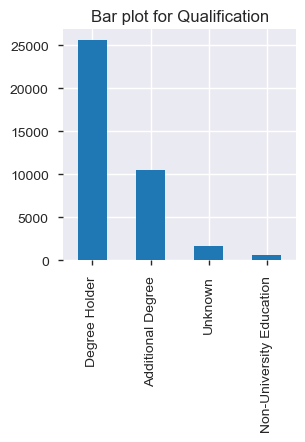

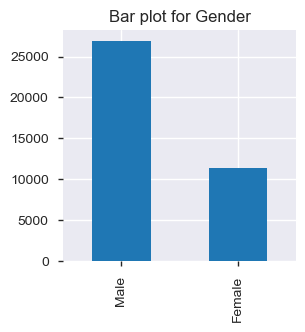

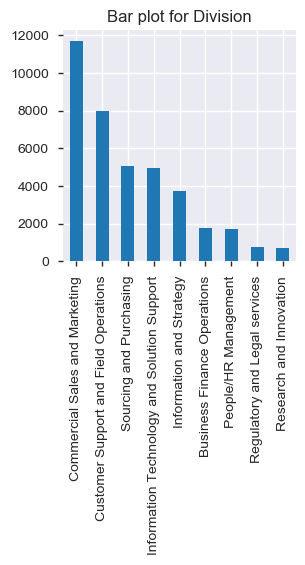

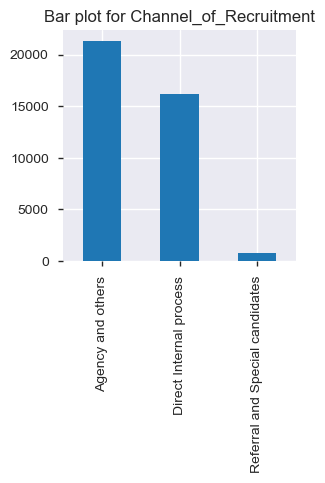

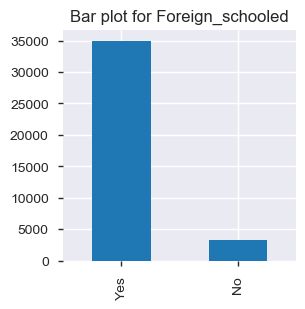

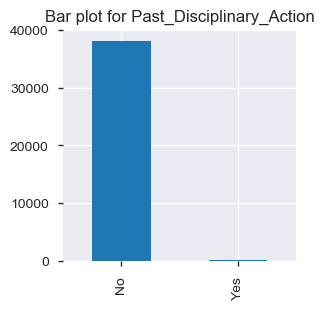

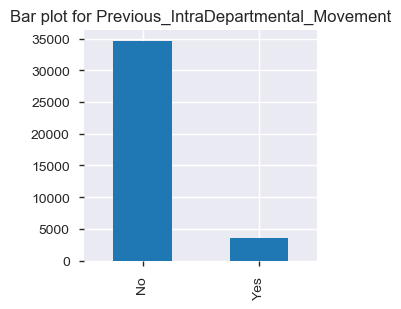

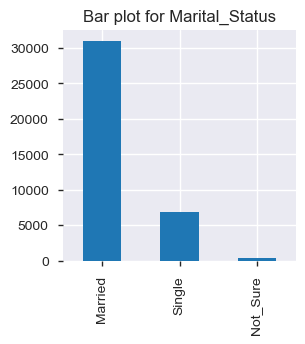

In [32]:
for col in cat_cols:
    fig = plt.figure(figsize=(3,3)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = train[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)

# 1. VISUALIZATION TO VIEW THE RELATIONSHIP BETWEEN THE FEATURES AND THE TARGET COLUMN

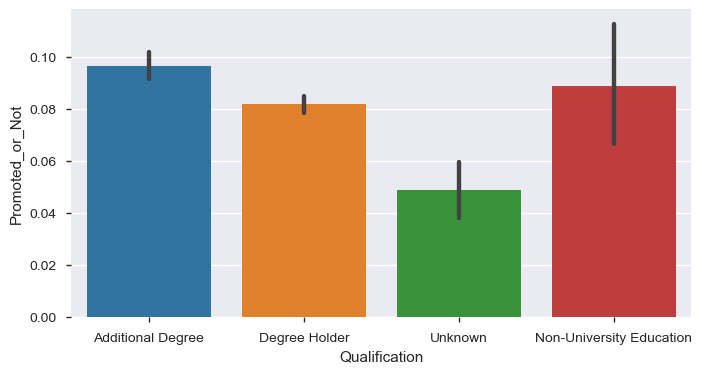

In [33]:
plt.figure(figsize=[8,4])
sns.barplot('Qualification', 'Promoted_or_Not', data=train)

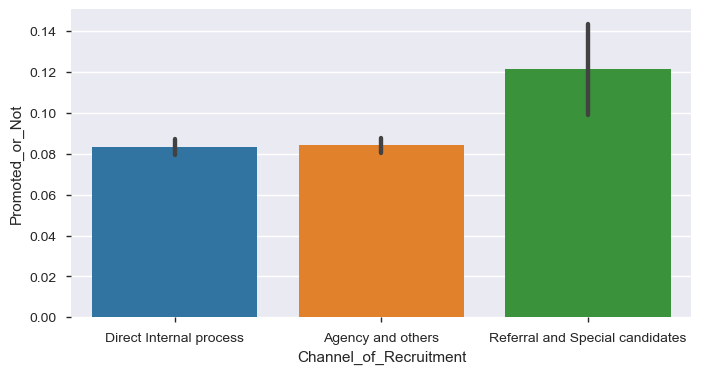

In [34]:
plt.figure(figsize=[8,4])
sns.barplot('Channel_of_Recruitment', 'Promoted_or_Not', data=train)

# the above plot shows a very good relationship between referral candidates and the target column i.e been promoted or not.

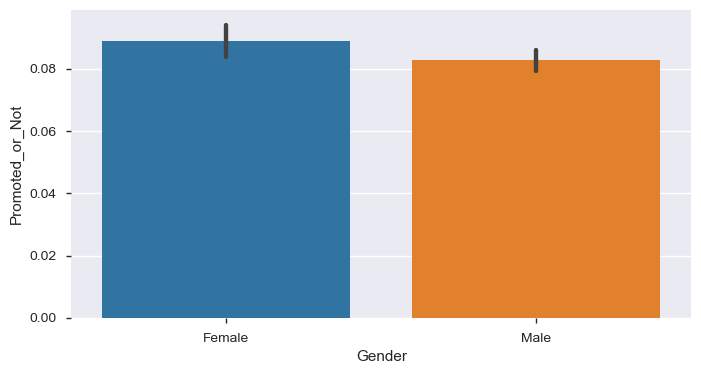

In [35]:
plt.figure(figsize=[8,4])
sns.barplot('Gender', 'Promoted_or_Not', data=train)

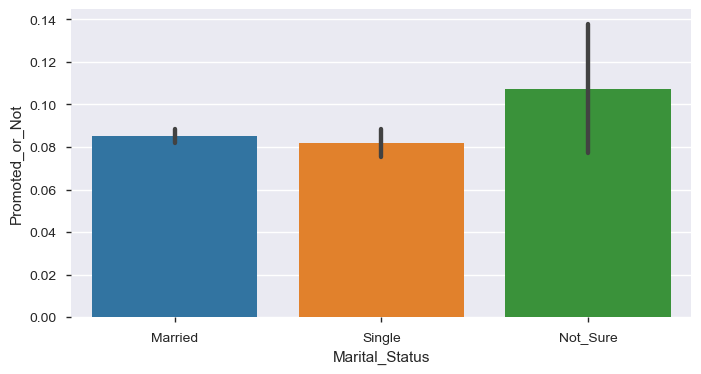

In [36]:
plt.figure(figsize=[8,4])
sns.barplot('Marital_Status', 'Promoted_or_Not', data=train)

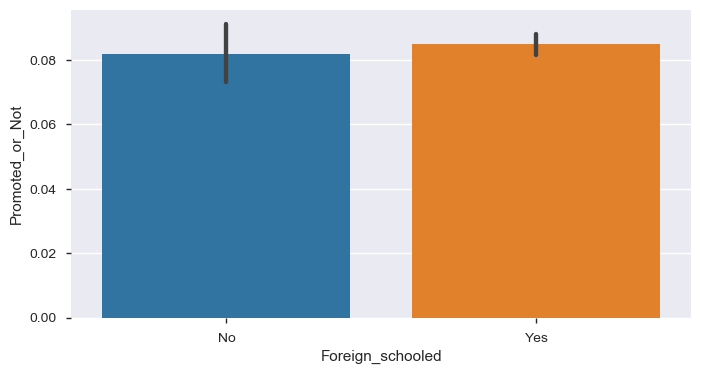

In [37]:
plt.figure(figsize=[8,4])
sns.barplot('Foreign_schooled', 'Promoted_or_Not', data=train)

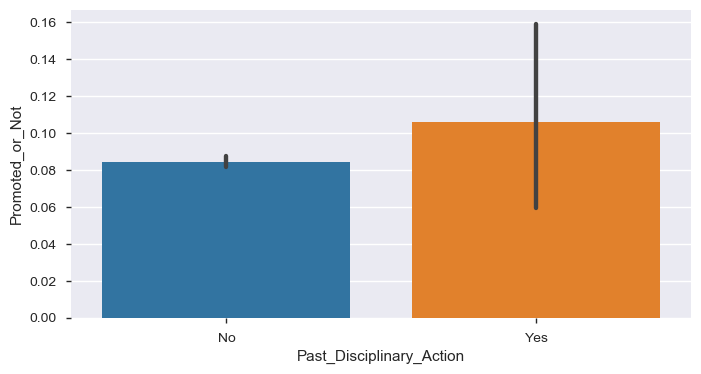

In [38]:
plt.figure(figsize=[8,4])
sns.barplot('Past_Disciplinary_Action', 'Promoted_or_Not', data=train)

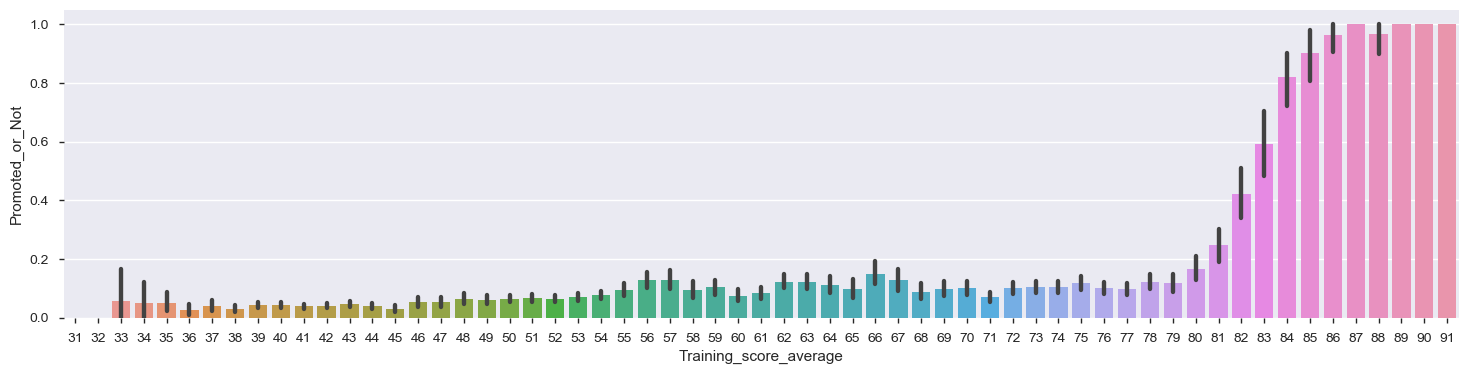

In [39]:
plt.figure(figsize=[18,4])
sns.barplot('Training_score_average', 'Promoted_or_Not', data=train)

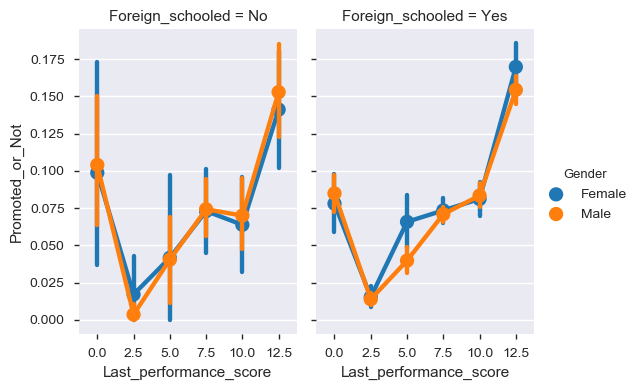

In [40]:
sns.factorplot(x="Last_performance_score", y="Promoted_or_Not", hue="Gender", col="Foreign_schooled",data=train, aspect=0.7, size=4, ci=95.0)

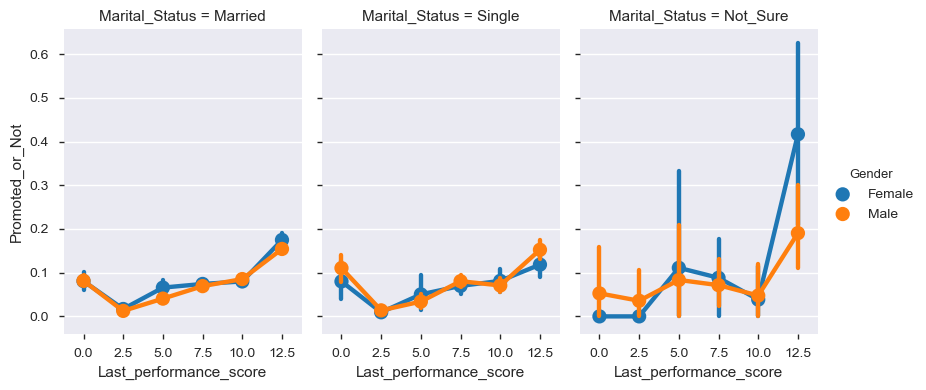

In [41]:
sns.factorplot(x="Last_performance_score", y="Promoted_or_Not", hue="Gender", col="Marital_Status",data=train, aspect=0.7, size=4, ci=95.0)

# FEATURE ENGINEERING
Engineering/Deriving useful features from available features in the data to gain more insights and help produce a better Model

In [42]:
#Deriving Age from Year of Birth
from datetime import date 
import datetime
pd.Timestamp('now').year
train['Age'] = pd.Timestamp('now').year - train['Year_of_birth'] 
test['Age'] = pd.Timestamp('now').year - test['Year_of_birth'] 

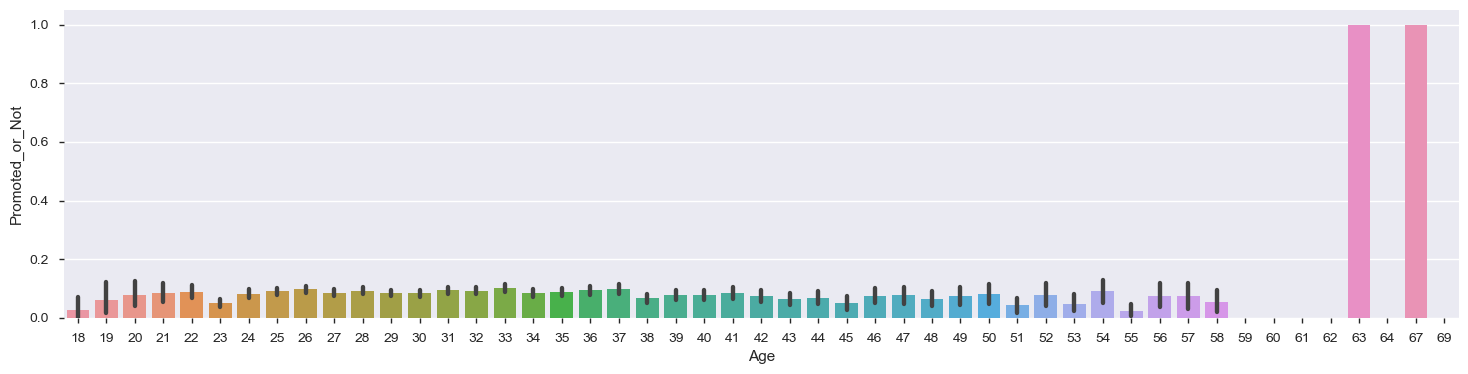

In [43]:
plt.figure(figsize=[18,4])
sns.barplot('Age', 'Promoted_or_Not', data=train)

In [44]:
train.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00001,YAK/S/00002,YAK/S/00003,YAK/S/00004,YAK/S/00006
Division,Commercial Sales and Marketing,Customer Support and Field Operations,Commercial Sales and Marketing,Commercial Sales and Marketing,Information and Strategy
Qualification,Additional Degree,Degree Holder,Degree Holder,Degree Holder,Degree Holder
Gender,Female,Male,Male,Male,Male
Channel_of_Recruitment,Direct Internal process,Agency and others,Direct Internal process,Agency and others,Direct Internal process
Trainings_Attended,2,2,2,3,3
Year_of_birth,1986,1991,1987,1982,1990
Last_performance_score,12.5,12.5,7.5,2.5,7.5
Year_of_recruitment,2011,2015,2012,2009,2012
Targets_met,1,0,0,0,0


In [45]:
#Derving Years of experience/Years of working 
train['Years_of_experience'] = pd.Timestamp('now').year - train['Year_of_recruitment']
test['Years_of_experience'] = pd.Timestamp('now').year - test['Year_of_recruitment']

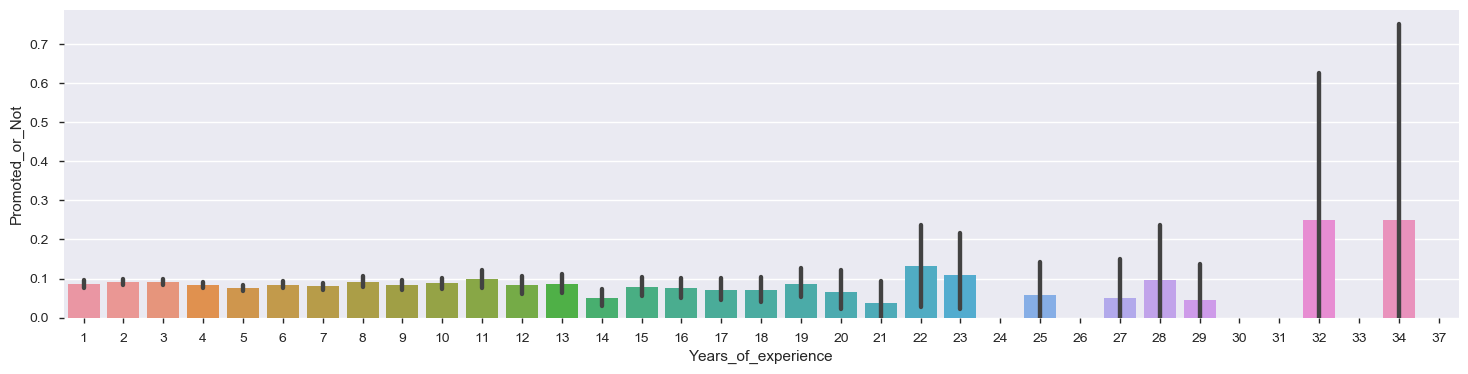

In [46]:
plt.figure(figsize=[18,4])
sns.barplot('Years_of_experience', 'Promoted_or_Not', data=train)

In [47]:
train.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00001,YAK/S/00002,YAK/S/00003,YAK/S/00004,YAK/S/00006
Division,Commercial Sales and Marketing,Customer Support and Field Operations,Commercial Sales and Marketing,Commercial Sales and Marketing,Information and Strategy
Qualification,Additional Degree,Degree Holder,Degree Holder,Degree Holder,Degree Holder
Gender,Female,Male,Male,Male,Male
Channel_of_Recruitment,Direct Internal process,Agency and others,Direct Internal process,Agency and others,Direct Internal process
Trainings_Attended,2,2,2,3,3
Year_of_birth,1986,1991,1987,1982,1990
Last_performance_score,12.5,12.5,7.5,2.5,7.5
Year_of_recruitment,2011,2015,2012,2009,2012
Targets_met,1,0,0,0,0


In [48]:
#Deriving Year of employment in the company/ Year of starting job in the company
train['Year_of_employment'] = train['Year_of_recruitment'] -train['Year_of_birth']
test['Year_of_employment'] = test['Year_of_recruitment'] -test['Year_of_birth']

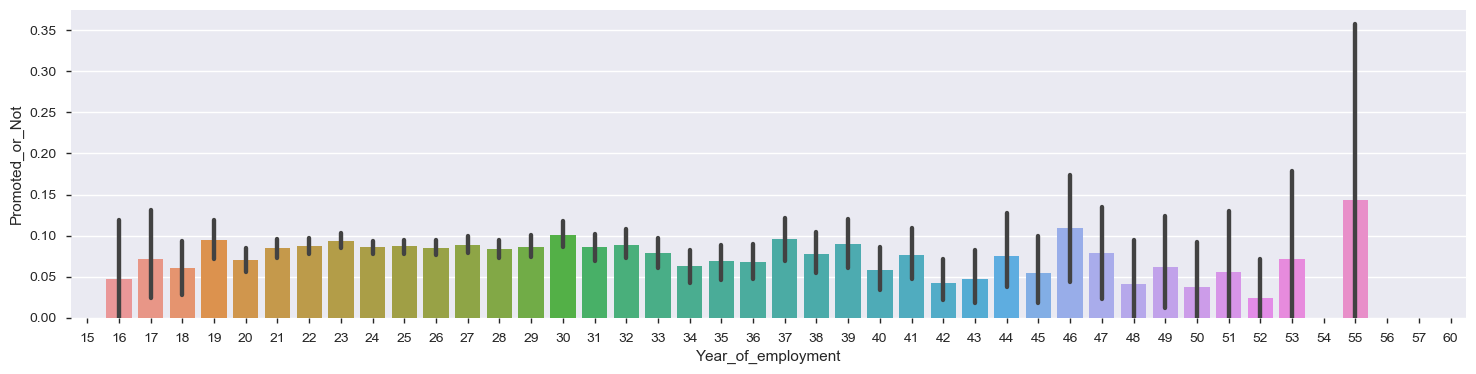

In [49]:
plt.figure(figsize=[18,4])
sns.barplot('Year_of_employment', 'Promoted_or_Not', data=train)

In [50]:
train.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00001,YAK/S/00002,YAK/S/00003,YAK/S/00004,YAK/S/00006
Division,Commercial Sales and Marketing,Customer Support and Field Operations,Commercial Sales and Marketing,Commercial Sales and Marketing,Information and Strategy
Qualification,Additional Degree,Degree Holder,Degree Holder,Degree Holder,Degree Holder
Gender,Female,Male,Male,Male,Male
Channel_of_Recruitment,Direct Internal process,Agency and others,Direct Internal process,Agency and others,Direct Internal process
Trainings_Attended,2,2,2,3,3
Year_of_birth,1986,1991,1987,1982,1990
Last_performance_score,12.5,12.5,7.5,2.5,7.5
Year_of_recruitment,2011,2015,2012,2009,2012
Targets_met,1,0,0,0,0


# feature engineering for State of Origin column , grouping into the Six(6) Geopolitcal zones in Nigeria to see if that shows a significant relationship with the target column

In [51]:
def region(x):
    if x == 'Abia':
        return 'South-East'
    elif x == 'Anambra':
        return 'South-East'
    elif x == 'Ebonyi':
        return 'South-East'
    elif x == 'Imo':
        return 'South-East'
    elif x == 'Enugu':
        return 'South-East'
    elif x == 'Akwa Ibom':
        return 'South-South'
    elif x == 'Bayelsa':
        return 'South-South'
    elif x == 'Cross River':
        return 'South-South'
    elif x == 'Edo':
        return 'South-South'
    elif x == 'Delta':
        return 'South-South'
    elif x == 'Edo':
        return 'South-South'
    elif x == 'Ekiti':
        return 'South-West'
    elif x == 'Lagos':
        return 'South-West'
    elif x == 'Ogun':
        return 'South-West'
    elif x == 'Ondo':
        return 'South-West'
    elif x == 'Osun':
        return 'South-West'
    elif x == 'Oyo':
        return 'South-West'
    elif x == 'Adamawa':
        return 'North-East'
    elif x == 'Bauchi':
        return 'North-East'
    elif x == 'Borno':
        return 'North-East'
    elif x == 'Gombe':
        return 'North-East'
    elif x == 'Taraba':
        return 'North-East'
    elif x == 'Yobe':
        return 'North-East'
    elif x == 'Jigawa':
        return 'North-West'
    elif x == 'Kaduna':
        return 'North-West'
    elif x == 'Kano':
        return 'North-West'
    elif x == 'Katsina':
        return 'North-West'
    elif x == 'Kebbi':
        return 'North-West'
    elif x == 'Sokoto':
        return 'North-West'
    elif x == 'Zamfara':
        return 'North-West'
    else:
        return 'North-Central'
train['Geopolitical_zones'] = train['State_Of_Origin'].apply(region)
geopolitical_zones =train[['State_Of_Origin','Geopolitical_zones']]

In [52]:
def region_test(y):
    if y == 'Abia':
        return 'South-East'
    elif y == 'Anambra':
        return 'South-East'
    elif y == 'Ebonyi':
        return 'South-East'
    elif y == 'Imo':
        return 'South-East'
    elif y == 'Enugu':
        return 'South-East'
    elif y == 'Akwa Ibom':
        return 'South-South'
    elif y == 'Bayelsa':
        return 'South-South'
    elif y == 'Cross River':
        return 'South-South'
    elif y == 'Edo':
        return 'South-South'
    elif y == 'Delta':
        return 'South-South'
    elif y == 'Edo':
        return 'South-South'
    elif y == 'Ekiti':
        return 'South-West'
    elif y == 'Lagos':
        return 'South-West'
    elif y == 'Ogun':
        return 'South-West'
    elif y == 'Ondo':
        return 'South-West'
    elif y == 'Osun':
        return 'South-West'
    elif y == 'Oyo':
        return 'South-West'
    elif y == 'Adamawa':
        return 'North-East'
    elif y == 'Bauchi':
        return 'North-East'
    elif y == 'Borno':
        return 'North-East'
    elif y == 'Gombe':
        return 'North-East'
    elif y == 'Taraba':
        return 'North-East'
    elif y == 'Yobe':
        return 'North-East'
    elif y == 'Jigawa':
        return 'North-West'
    elif y == 'Kaduna':
        return 'North-West'
    elif y == 'Kano':
        return 'North-West'
    elif y == 'Katsina':
        return 'North-West'
    elif y == 'Kebbi':
        return 'North-West'
    elif y == 'Sokoto':
        return 'North-West'
    elif y == 'Zamfara':
        return 'North-West'
    else:
        return 'North-Central'
test['Geopolitical_zones'] = test['State_Of_Origin'].apply(region_test)
geopolitical_zones_test =test[['State_Of_Origin','Geopolitical_zones']]

In [53]:
train.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00001,YAK/S/00002,YAK/S/00003,YAK/S/00004,YAK/S/00006
Division,Commercial Sales and Marketing,Customer Support and Field Operations,Commercial Sales and Marketing,Commercial Sales and Marketing,Information and Strategy
Qualification,Additional Degree,Degree Holder,Degree Holder,Degree Holder,Degree Holder
Gender,Female,Male,Male,Male,Male
Channel_of_Recruitment,Direct Internal process,Agency and others,Direct Internal process,Agency and others,Direct Internal process
Trainings_Attended,2,2,2,3,3
Year_of_birth,1986,1991,1987,1982,1990
Last_performance_score,12.5,12.5,7.5,2.5,7.5
Year_of_recruitment,2011,2015,2012,2009,2012
Targets_met,1,0,0,0,0


In [54]:
test.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00005,YAK/S/00011,YAK/S/00015,YAK/S/00016,YAK/S/00017
Division,Information Technology and Solution Support,Information Technology and Solution Support,Research and Innovation,Customer Support and Field Operations,Information Technology and Solution Support
Qualification,Degree Holder,Unknown,Additional Degree,Degree Holder,Degree Holder
Gender,Male,Male,Male,Male,Male
Channel_of_Recruitment,Agency and others,Direct Internal process,Direct Internal process,Agency and others,Agency and others
Trainings_Attended,2,2,2,2,2
Year_of_birth,1976,1991,1984,1984,1983
Last_performance_score,7.5,0,7.5,2.5,7.5
Year_of_recruitment,2017,2018,2012,2009,2014
Targets_met,0,0,0,0,1


In [55]:
train['Age'].unique()

array([33, 28, 32, 37, 29, 31, 26, 30, 47, 35, 39, 25, 27, 24, 22, 38, 40, 21, 48, 23, 36, 45, 18, 44, 42, 62, 34, 41, 20, 43, 55, 46, 56, 51, 53, 49, 50, 54, 58, 57, 52, 69, 19, 61, 67, 64, 63, 60, 59], dtype=int64)

In [56]:
test['Age'].unique()

array([43, 28, 35, 36, 32, 29, 31, 24, 55, 38, 57, 42, 54, 18, 26, 25, 23, 34, 37, 39, 27, 33, 41, 21, 48, 52, 30, 56, 20, 40, 47, 46, 58, 22, 51, 45, 44, 50, 53, 49, 19, 61, 60, 59], dtype=int64)

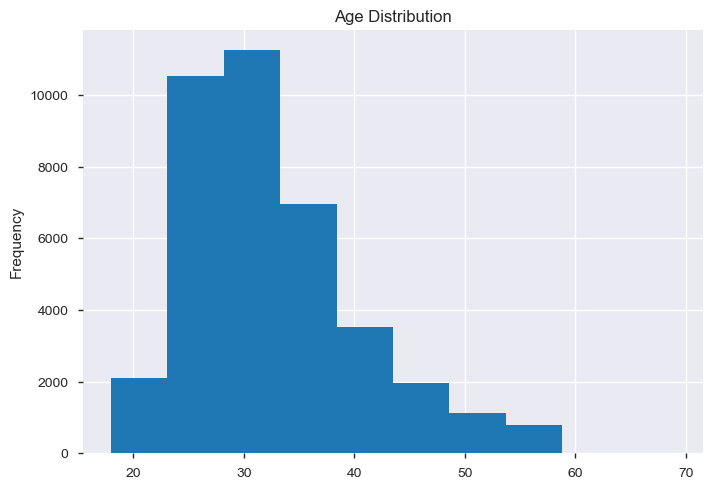

In [57]:
train['Age'].plot.hist(title ='Age Distribution')

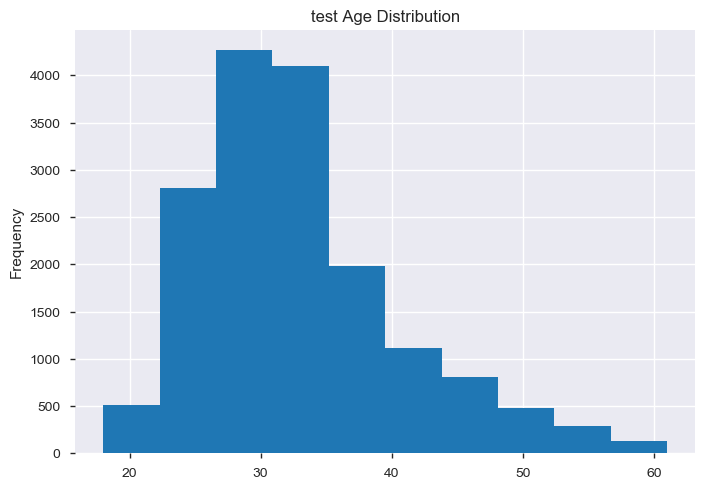

In [58]:
test['Age'].plot.hist(title = 'test Age Distribution')

In [59]:
def career_level(x):
    if x >= 18 and x <= 24:
        return 'Entry_level_Career'
    elif x >= 25 and x <= 34:
        return 'Mid_level_Career'
    elif x >= 35 and x <= 64:
        return 'Senior_Executives_Career'
    else:
        return 'Retirement_Age'
train['Career_Levels'] = train['Age'].apply(career_level)
career_levels =train[['Age','Career_Levels']]

In [60]:
train.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00001,YAK/S/00002,YAK/S/00003,YAK/S/00004,YAK/S/00006
Division,Commercial Sales and Marketing,Customer Support and Field Operations,Commercial Sales and Marketing,Commercial Sales and Marketing,Information and Strategy
Qualification,Additional Degree,Degree Holder,Degree Holder,Degree Holder,Degree Holder
Gender,Female,Male,Male,Male,Male
Channel_of_Recruitment,Direct Internal process,Agency and others,Direct Internal process,Agency and others,Direct Internal process
Trainings_Attended,2,2,2,3,3
Year_of_birth,1986,1991,1987,1982,1990
Last_performance_score,12.5,12.5,7.5,2.5,7.5
Year_of_recruitment,2011,2015,2012,2009,2012
Targets_met,1,0,0,0,0


In [61]:
test['Career_Levels'] = test['Age'].apply(career_level)
career_levels =test[['Age','Career_Levels']]

In [62]:
test.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00005,YAK/S/00011,YAK/S/00015,YAK/S/00016,YAK/S/00017
Division,Information Technology and Solution Support,Information Technology and Solution Support,Research and Innovation,Customer Support and Field Operations,Information Technology and Solution Support
Qualification,Degree Holder,Unknown,Additional Degree,Degree Holder,Degree Holder
Gender,Male,Male,Male,Male,Male
Channel_of_Recruitment,Agency and others,Direct Internal process,Direct Internal process,Agency and others,Agency and others
Trainings_Attended,2,2,2,2,2
Year_of_birth,1976,1991,1984,1984,1983
Last_performance_score,7.5,0,7.5,2.5,7.5
Year_of_recruitment,2017,2018,2012,2009,2014
Targets_met,0,0,0,0,1


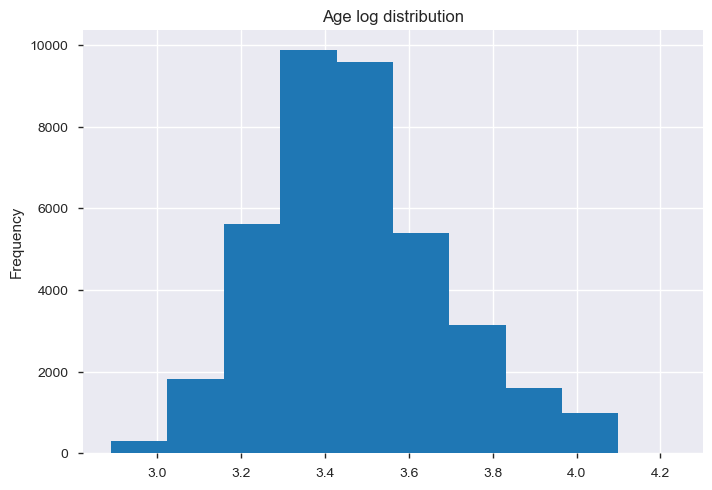

In [63]:
#Taking log transformation of Age for both train and test
train['Age Log'] = train['Age'].apply(np.log)
test['Age Log'] = test['Age'].apply(np.log)
train['Age Log'].plot.hist(title = 'Age log distribution')

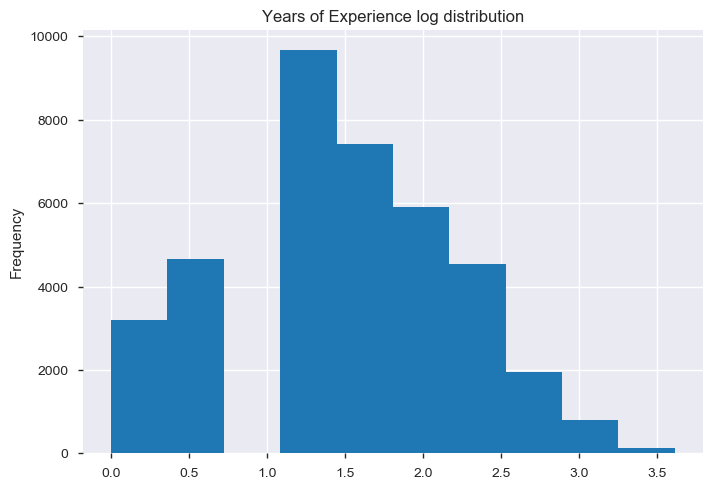

In [64]:
train['Years_of_experience_log'] = train['Years_of_experience'].apply(np.log)
test['Years_of_experience_log'] = test['Years_of_experience'].apply(np.log)
train['Years_of_experience_log'].plot.hist(title = 'Years of Experience log distribution')

# Looking more indepth into other features such as Training_score_average and last_performance_score and seeing what useful features can be generated from them

In [65]:
def grade(x):
    if x <= 39:
        return 'F'
    elif x > 39  and x <= 44:
        return 'E'
    elif x > 44 and x <= 49:
        return 'D'
    elif x > 49 and x <= 59:
        return 'C'
    elif x > 59 and x <= 69:
        return 'B'
    else:
        return 'A'

In [66]:
train['Training_Score_Average_Grade'] = train['Training_score_average'].apply(grade)
score =train[['Training_score_average','Training_Score_Average_Grade']]
train.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00001,YAK/S/00002,YAK/S/00003,YAK/S/00004,YAK/S/00006
Division,Commercial Sales and Marketing,Customer Support and Field Operations,Commercial Sales and Marketing,Commercial Sales and Marketing,Information and Strategy
Qualification,Additional Degree,Degree Holder,Degree Holder,Degree Holder,Degree Holder
Gender,Female,Male,Male,Male,Male
Channel_of_Recruitment,Direct Internal process,Agency and others,Direct Internal process,Agency and others,Direct Internal process
Trainings_Attended,2,2,2,3,3
Year_of_birth,1986,1991,1987,1982,1990
Last_performance_score,12.5,12.5,7.5,2.5,7.5
Year_of_recruitment,2011,2015,2012,2009,2012
Targets_met,1,0,0,0,0


In [67]:
test['Training_Score_Average_Grade'] = test['Training_score_average'].apply(grade)
score =test[['Training_score_average','Training_Score_Average_Grade']]
test.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00005,YAK/S/00011,YAK/S/00015,YAK/S/00016,YAK/S/00017
Division,Information Technology and Solution Support,Information Technology and Solution Support,Research and Innovation,Customer Support and Field Operations,Information Technology and Solution Support
Qualification,Degree Holder,Unknown,Additional Degree,Degree Holder,Degree Holder
Gender,Male,Male,Male,Male,Male
Channel_of_Recruitment,Agency and others,Direct Internal process,Direct Internal process,Agency and others,Agency and others
Trainings_Attended,2,2,2,2,2
Year_of_birth,1976,1991,1984,1984,1983
Last_performance_score,7.5,0,7.5,2.5,7.5
Year_of_recruitment,2017,2018,2012,2009,2014
Targets_met,0,0,0,0,1


In [68]:
train['Last_performance_score'].unique()

array([12.5,  7.5,  2.5, 10. ,  0. ,  5. ])

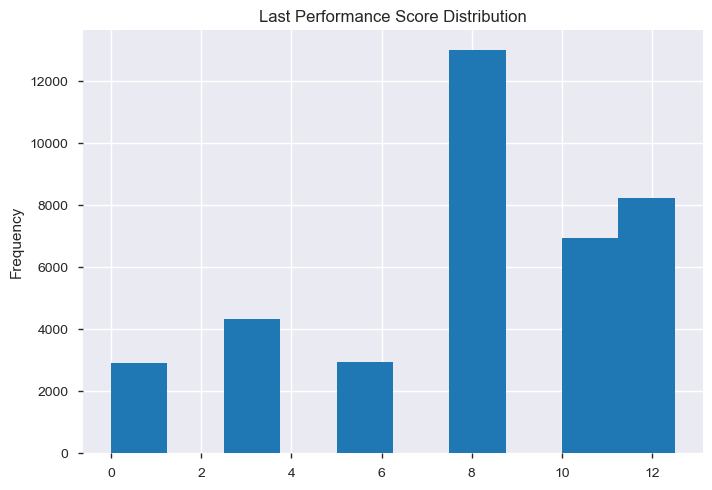

In [69]:
train['Last_performance_score'].plot.hist(title ='Last Performance Score Distribution')

In [70]:
def performance_score_grading(x):
    if x >= 12.5:
        return 'Excellent'
    elif x >= 10:
        return 'Very Good'
    elif x >= 7.5:
        return 'Fairly Good'
    elif x >=5:
        return 'Good'
    else:
        return 'Poor'

In [71]:
train['Performance_Score_Grading'] = train['Last_performance_score'].apply(performance_score_grading)
performance_grading =train[['Last_performance_score','Performance_Score_Grading']]
train.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00001,YAK/S/00002,YAK/S/00003,YAK/S/00004,YAK/S/00006
Division,Commercial Sales and Marketing,Customer Support and Field Operations,Commercial Sales and Marketing,Commercial Sales and Marketing,Information and Strategy
Qualification,Additional Degree,Degree Holder,Degree Holder,Degree Holder,Degree Holder
Gender,Female,Male,Male,Male,Male
Channel_of_Recruitment,Direct Internal process,Agency and others,Direct Internal process,Agency and others,Direct Internal process
Trainings_Attended,2,2,2,3,3
Year_of_birth,1986,1991,1987,1982,1990
Last_performance_score,12.5,12.5,7.5,2.5,7.5
Year_of_recruitment,2011,2015,2012,2009,2012
Targets_met,1,0,0,0,0


In [72]:
test['Performance_Score_Grading'] = test['Last_performance_score'].apply(performance_score_grading)
performance_grading =test[['Last_performance_score','Performance_Score_Grading']]
test.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00005,YAK/S/00011,YAK/S/00015,YAK/S/00016,YAK/S/00017
Division,Information Technology and Solution Support,Information Technology and Solution Support,Research and Innovation,Customer Support and Field Operations,Information Technology and Solution Support
Qualification,Degree Holder,Unknown,Additional Degree,Degree Holder,Degree Holder
Gender,Male,Male,Male,Male,Male
Channel_of_Recruitment,Agency and others,Direct Internal process,Direct Internal process,Agency and others,Agency and others
Trainings_Attended,2,2,2,2,2
Year_of_birth,1976,1991,1984,1984,1983
Last_performance_score,7.5,0,7.5,2.5,7.5
Year_of_recruitment,2017,2018,2012,2009,2014
Targets_met,0,0,0,0,1


# from the correlation matrix earlier plotted on pandas profiling, it can be observed that certain features such as last performance score, training score average and Target mets are highly correlated. This fact could be very useful in finding a relationship between these features and others , and possibly engineering other useful features. The next line of codes, explore this. 

In [73]:
def correlated_features(train):
    if (train['Last_performance_score'] >=10) & (train['Age'] <= 55) & (train['Training_score_average']  >=70) & (train['Previous_Award'] == 1) & (train['Targets_met'] == 1):
        score = 1
    else:
        score =0
    return score

In [74]:
def correlated_features(test):
    if (test['Last_performance_score'] >=10) & (test['Age'] <= 55) & (test['Training_score_average']  >=70) & (test['Previous_Award'] == 1) & (test['Targets_met'] == 1):
        score = 1
    else:
        score =0
    return score

In [75]:
train['Employee_Rating'] = train.apply(correlated_features, axis =1)
test['Employee_Rating'] = test.apply(correlated_features, axis =1)

In [76]:
train.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00001,YAK/S/00002,YAK/S/00003,YAK/S/00004,YAK/S/00006
Division,Commercial Sales and Marketing,Customer Support and Field Operations,Commercial Sales and Marketing,Commercial Sales and Marketing,Information and Strategy
Qualification,Additional Degree,Degree Holder,Degree Holder,Degree Holder,Degree Holder
Gender,Female,Male,Male,Male,Male
Channel_of_Recruitment,Direct Internal process,Agency and others,Direct Internal process,Agency and others,Direct Internal process
Trainings_Attended,2,2,2,3,3
Year_of_birth,1986,1991,1987,1982,1990
Last_performance_score,12.5,12.5,7.5,2.5,7.5
Year_of_recruitment,2011,2015,2012,2009,2012
Targets_met,1,0,0,0,0


In [77]:
bins=[0, 5, 10, 15]
labels =[1,2,3]
train['Binned_performance'] = pd.cut(train['Last_performance_score'], bins = bins, labels =labels)
test['Binned_performance'] = pd.cut(test['Last_performance_score'], bins = bins, labels =labels)

In [78]:
train['Binned_performance'].replace(np.nan, 0, inplace =True)
test['Binned_performance'].replace(np.nan, 0, inplace =True)

In [79]:
train = train.drop(['Foreign_schooled','Year_of_recruitment','Year_of_birth'], axis =1)
test= test.drop(['Foreign_schooled','Year_of_recruitment','Year_of_birth'], axis =1)

In [80]:
train.corr()

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Age,Years_of_experience,Year_of_employment,Age Log,Years_of_experience_log,Employee_Rating,Binned_performance
Trainings_Attended,1.000000,-0.062042,-0.044789,-0.007409,0.041065,-0.024345,-0.078710,-0.056215,-0.062164,-0.080063,-0.058821,0.000775,-0.050049
Last_performance_score,-0.062042,1.000000,0.276350,0.026587,0.057836,0.119690,0.175572,0.190333,0.091178,0.199643,0.347274,0.058742,0.960846
Targets_met,-0.044789,0.276350,1.000000,0.092934,0.077201,0.224518,-0.025337,-0.076910,0.022998,-0.020087,-0.056855,0.077768,0.253085
Previous_Award,-0.007409,0.026587,0.092934,1.000000,0.072360,0.201434,-0.013627,-0.041995,0.012830,-0.012247,-0.032025,0.373123,0.026231
Training_score_average,0.041065,0.057836,0.077201,0.072360,1.000000,0.178448,-0.048390,-0.037477,-0.036085,-0.045894,-0.033293,0.104768,0.051593
Promoted_or_Not,-0.024345,0.119690,0.224518,0.201434,0.178448,1.000000,-0.017991,-0.012287,-0.014620,-0.014998,-0.010634,0.128343,0.115255
Age,-0.078710,0.175572,-0.025337,-0.013627,-0.048390,-0.017991,1.000000,0.654666,0.833329,0.989907,0.618762,-0.008206,0.195788
Years_of_experience,-0.056215,0.190333,-0.076910,-0.041995,-0.037477,-0.012287,0.654666,1.000000,0.127697,0.652358,0.896939,-0.017374,0.210653
Year_of_employment,-0.062164,0.091178,0.022998,0.012830,-0.036085,-0.014620,0.833329,0.127697,1.000000,0.821774,0.155954,0.001938,0.102843
Age Log,-0.080063,0.199643,-0.020087,-0.012247,-0.045894,-0.014998,0.989907,0.652358,0.821774,1.000000,0.647648,-0.008265,0.221931


In [81]:
train = train.drop(['Performance_Score_Grading','State_Of_Origin'], axis =1)
test= test.drop(['Performance_Score_Grading','State_Of_Origin'], axis =1)

# MODELLING 
### 1. The CatBoost Classifier Algorithm

In [82]:
X =train.drop(['Promoted_or_Not'], axis =1)
y =train.Promoted_or_Not

In [83]:
cate_features_index=np.where(X.dtypes != float) [0]; cate_features_index

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22], dtype=int64)

In [104]:
cat_algo = CatBoostClassifier(iterations=5100, depth=7, learning_rate=0.0495, eval_metric ='Accuracy',use_best_model=True, random_seed=42)
cat_algo.fit(X,y,cat_features=cate_features_index,eval_set=(X,y))

0:	learn: 0.9368866	test: 0.9421330	best: 0.9421330 (0)	total: 125ms	remaining: 10m 37s
1:	learn: 0.9388964	test: 0.9424201	best: 0.9424201 (1)	total: 248ms	remaining: 10m 32s
2:	learn: 0.9391835	test: 0.9423679	best: 0.9424201 (1)	total: 398ms	remaining: 11m 16s
3:	learn: 0.9393402	test: 0.9424723	best: 0.9424723 (3)	total: 723ms	remaining: 15m 21s
4:	learn: 0.9392619	test: 0.9424723	best: 0.9424723 (3)	total: 1.14s	remaining: 19m 25s
5:	learn: 0.9392619	test: 0.9424462	best: 0.9424723 (3)	total: 1.31s	remaining: 18m 30s
6:	learn: 0.9394446	test: 0.9424201	best: 0.9424723 (3)	total: 1.65s	remaining: 19m 57s
7:	learn: 0.9395490	test: 0.9424462	best: 0.9424723 (3)	total: 1.92s	remaining: 20m 20s
8:	learn: 0.9395490	test: 0.9424462	best: 0.9424723 (3)	total: 2.25s	remaining: 21m 11s
9:	learn: 0.9398622	test: 0.9425245	best: 0.9425245 (9)	total: 2.49s	remaining: 21m 6s
10:	learn: 0.9401754	test: 0.9426289	best: 0.9426289 (10)	total: 2.79s	remaining: 21m 29s
11:	learn: 0.9404103	test: 0.94

92:	learn: 0.9423940	test: 0.9430466	best: 0.9430466 (92)	total: 28.2s	remaining: 25m 17s
93:	learn: 0.9423940	test: 0.9430466	best: 0.9430466 (92)	total: 28.3s	remaining: 25m 5s
94:	learn: 0.9423940	test: 0.9430727	best: 0.9430727 (94)	total: 28.5s	remaining: 25m 2s
95:	learn: 0.9424201	test: 0.9430988	best: 0.9430988 (95)	total: 28.9s	remaining: 25m 6s
96:	learn: 0.9424201	test: 0.9431249	best: 0.9431249 (96)	total: 29.1s	remaining: 24m 59s
97:	learn: 0.9424723	test: 0.9430988	best: 0.9431249 (96)	total: 29.5s	remaining: 25m 4s
98:	learn: 0.9424462	test: 0.9430988	best: 0.9431249 (96)	total: 29.7s	remaining: 24m 59s
99:	learn: 0.9424462	test: 0.9430988	best: 0.9431249 (96)	total: 29.8s	remaining: 24m 49s
100:	learn: 0.9424984	test: 0.9430988	best: 0.9431249 (96)	total: 30.1s	remaining: 24m 50s
101:	learn: 0.9425245	test: 0.9431771	best: 0.9431771 (101)	total: 30.5s	remaining: 24m 52s
102:	learn: 0.9425245	test: 0.9431771	best: 0.9431771 (101)	total: 30.6s	remaining: 24m 43s
103:	lear

182:	learn: 0.9428378	test: 0.9434120	best: 0.9434381 (173)	total: 52.4s	remaining: 23m 29s
183:	learn: 0.9428378	test: 0.9434120	best: 0.9434381 (173)	total: 52.8s	remaining: 23m 31s
184:	learn: 0.9428378	test: 0.9434120	best: 0.9434381 (173)	total: 53s	remaining: 23m 27s
185:	learn: 0.9428378	test: 0.9434120	best: 0.9434381 (173)	total: 53.1s	remaining: 23m 24s
186:	learn: 0.9428639	test: 0.9434381	best: 0.9434381 (173)	total: 53.6s	remaining: 23m 27s
187:	learn: 0.9428639	test: 0.9434381	best: 0.9434381 (173)	total: 53.7s	remaining: 23m 21s
188:	learn: 0.9428639	test: 0.9434381	best: 0.9434381 (173)	total: 53.8s	remaining: 23m 18s
189:	learn: 0.9428639	test: 0.9434381	best: 0.9434381 (173)	total: 54.1s	remaining: 23m 17s
190:	learn: 0.9428639	test: 0.9434381	best: 0.9434381 (173)	total: 54.5s	remaining: 23m 20s
191:	learn: 0.9429161	test: 0.9434381	best: 0.9434381 (173)	total: 55s	remaining: 23m 24s
192:	learn: 0.9429161	test: 0.9434381	best: 0.9434381 (173)	total: 55.4s	remaining: 

271:	learn: 0.9433337	test: 0.9435686	best: 0.9435686 (269)	total: 1m 25s	remaining: 25m 19s
272:	learn: 0.9432815	test: 0.9435947	best: 0.9435947 (272)	total: 1m 25s	remaining: 25m 19s
273:	learn: 0.9433076	test: 0.9436208	best: 0.9436208 (273)	total: 1m 26s	remaining: 25m 21s
274:	learn: 0.9433337	test: 0.9436208	best: 0.9436208 (273)	total: 1m 28s	remaining: 25m 58s
275:	learn: 0.9433337	test: 0.9436469	best: 0.9436469 (275)	total: 1m 29s	remaining: 26m 6s
276:	learn: 0.9433337	test: 0.9436208	best: 0.9436469 (275)	total: 1m 30s	remaining: 26m 7s
277:	learn: 0.9433337	test: 0.9436208	best: 0.9436469 (275)	total: 1m 30s	remaining: 26m 7s
278:	learn: 0.9433337	test: 0.9435947	best: 0.9436469 (275)	total: 1m 30s	remaining: 26m 8s
279:	learn: 0.9433337	test: 0.9436208	best: 0.9436469 (275)	total: 1m 31s	remaining: 26m 9s
280:	learn: 0.9433337	test: 0.9436208	best: 0.9436469 (275)	total: 1m 31s	remaining: 26m 11s
281:	learn: 0.9433598	test: 0.9436469	best: 0.9436469 (275)	total: 1m 32s	r

360:	learn: 0.9440123	test: 0.9436991	best: 0.9437252 (334)	total: 1m 59s	remaining: 26m 4s
361:	learn: 0.9440645	test: 0.9437252	best: 0.9437252 (334)	total: 1m 59s	remaining: 26m 4s
362:	learn: 0.9440645	test: 0.9437252	best: 0.9437252 (334)	total: 1m 59s	remaining: 26m 4s
363:	learn: 0.9440384	test: 0.9436991	best: 0.9437252 (334)	total: 2m	remaining: 26m 3s
364:	learn: 0.9440384	test: 0.9436991	best: 0.9437252 (334)	total: 2m	remaining: 26m 3s
365:	learn: 0.9440384	test: 0.9436991	best: 0.9437252 (334)	total: 2m	remaining: 26m 3s
366:	learn: 0.9440645	test: 0.9437252	best: 0.9437252 (334)	total: 2m 1s	remaining: 26m 3s
367:	learn: 0.9441167	test: 0.9437513	best: 0.9437513 (367)	total: 2m 1s	remaining: 26m 3s
368:	learn: 0.9441167	test: 0.9437252	best: 0.9437513 (367)	total: 2m 1s	remaining: 26m 2s
369:	learn: 0.9441167	test: 0.9437252	best: 0.9437513 (367)	total: 2m 2s	remaining: 26m 1s
370:	learn: 0.9441428	test: 0.9437252	best: 0.9437513 (367)	total: 2m 2s	remaining: 26m 1s
371:	

449:	learn: 0.9443255	test: 0.9439340	best: 0.9439862 (416)	total: 2m 28s	remaining: 25m 31s
450:	learn: 0.9442994	test: 0.9439340	best: 0.9439862 (416)	total: 2m 28s	remaining: 25m 31s
451:	learn: 0.9443516	test: 0.9439340	best: 0.9439862 (416)	total: 2m 28s	remaining: 25m 31s
452:	learn: 0.9443516	test: 0.9439340	best: 0.9439862 (416)	total: 2m 29s	remaining: 25m 31s
453:	learn: 0.9443516	test: 0.9439340	best: 0.9439862 (416)	total: 2m 29s	remaining: 25m 31s
454:	learn: 0.9443777	test: 0.9439340	best: 0.9439862 (416)	total: 2m 29s	remaining: 25m 30s
455:	learn: 0.9444038	test: 0.9439601	best: 0.9439862 (416)	total: 2m 30s	remaining: 25m 30s
456:	learn: 0.9444299	test: 0.9439601	best: 0.9439862 (416)	total: 2m 30s	remaining: 25m 30s
457:	learn: 0.9444299	test: 0.9439601	best: 0.9439862 (416)	total: 2m 30s	remaining: 25m 29s
458:	learn: 0.9444038	test: 0.9439862	best: 0.9439862 (416)	total: 2m 31s	remaining: 25m 29s
459:	learn: 0.9443777	test: 0.9439862	best: 0.9439862 (416)	total: 2m 

538:	learn: 0.9449781	test: 0.9440645	best: 0.9440645 (531)	total: 2m 57s	remaining: 25m 6s
539:	learn: 0.9449520	test: 0.9440645	best: 0.9440645 (531)	total: 2m 58s	remaining: 25m 5s
540:	learn: 0.9449259	test: 0.9440645	best: 0.9440645 (531)	total: 2m 58s	remaining: 25m 5s
541:	learn: 0.9449259	test: 0.9440645	best: 0.9440645 (531)	total: 2m 58s	remaining: 25m 4s
542:	learn: 0.9449259	test: 0.9440645	best: 0.9440645 (531)	total: 2m 59s	remaining: 25m 4s
543:	learn: 0.9449520	test: 0.9440645	best: 0.9440645 (531)	total: 2m 59s	remaining: 25m 4s
544:	learn: 0.9449781	test: 0.9440645	best: 0.9440645 (531)	total: 2m 59s	remaining: 25m 4s
545:	learn: 0.9449781	test: 0.9440645	best: 0.9440645 (531)	total: 3m	remaining: 25m 3s
546:	learn: 0.9449781	test: 0.9440645	best: 0.9440645 (531)	total: 3m	remaining: 25m 3s
547:	learn: 0.9450042	test: 0.9440645	best: 0.9440645 (531)	total: 3m	remaining: 25m 3s
548:	learn: 0.9450042	test: 0.9440645	best: 0.9440645 (531)	total: 3m 1s	remaining: 25m 3s
5

628:	learn: 0.9453696	test: 0.9440906	best: 0.9440906 (603)	total: 3m 31s	remaining: 25m
629:	learn: 0.9453696	test: 0.9440906	best: 0.9440906 (603)	total: 3m 31s	remaining: 25m 1s
630:	learn: 0.9453696	test: 0.9440906	best: 0.9440906 (603)	total: 3m 32s	remaining: 25m 1s
631:	learn: 0.9453696	test: 0.9440906	best: 0.9440906 (603)	total: 3m 32s	remaining: 25m 1s
632:	learn: 0.9453435	test: 0.9440906	best: 0.9440906 (603)	total: 3m 32s	remaining: 25m 1s
633:	learn: 0.9453435	test: 0.9440906	best: 0.9440906 (603)	total: 3m 33s	remaining: 25m 1s
634:	learn: 0.9453696	test: 0.9440906	best: 0.9440906 (603)	total: 3m 33s	remaining: 25m 1s
635:	learn: 0.9453696	test: 0.9440906	best: 0.9440906 (603)	total: 3m 33s	remaining: 25m 1s
636:	learn: 0.9453696	test: 0.9440906	best: 0.9440906 (603)	total: 3m 34s	remaining: 25m 1s
637:	learn: 0.9453957	test: 0.9440906	best: 0.9440906 (603)	total: 3m 34s	remaining: 25m 1s
638:	learn: 0.9454218	test: 0.9440906	best: 0.9440906 (603)	total: 3m 35s	remaining

717:	learn: 0.9458133	test: 0.9443516	best: 0.9443516 (708)	total: 4m 1s	remaining: 24m 34s
718:	learn: 0.9458133	test: 0.9443516	best: 0.9443516 (708)	total: 4m 1s	remaining: 24m 33s
719:	learn: 0.9458133	test: 0.9443516	best: 0.9443516 (708)	total: 4m 2s	remaining: 24m 33s
720:	learn: 0.9458133	test: 0.9443255	best: 0.9443516 (708)	total: 4m 2s	remaining: 24m 33s
721:	learn: 0.9458394	test: 0.9443255	best: 0.9443516 (708)	total: 4m 2s	remaining: 24m 33s
722:	learn: 0.9458655	test: 0.9443516	best: 0.9443516 (708)	total: 4m 3s	remaining: 24m 32s
723:	learn: 0.9458655	test: 0.9443516	best: 0.9443516 (708)	total: 4m 3s	remaining: 24m 32s
724:	learn: 0.9458394	test: 0.9443516	best: 0.9443516 (708)	total: 4m 3s	remaining: 24m 31s
725:	learn: 0.9458394	test: 0.9443516	best: 0.9443516 (708)	total: 4m 4s	remaining: 24m 31s
726:	learn: 0.9458394	test: 0.9443516	best: 0.9443516 (708)	total: 4m 4s	remaining: 24m 31s
727:	learn: 0.9458394	test: 0.9443516	best: 0.9443516 (708)	total: 4m 4s	remaini

806:	learn: 0.9461526	test: 0.9444560	best: 0.9444560 (750)	total: 4m 31s	remaining: 24m 5s
807:	learn: 0.9461526	test: 0.9444560	best: 0.9444560 (750)	total: 4m 31s	remaining: 24m 4s
808:	learn: 0.9461265	test: 0.9444299	best: 0.9444560 (750)	total: 4m 32s	remaining: 24m 4s
809:	learn: 0.9461265	test: 0.9444038	best: 0.9444560 (750)	total: 4m 32s	remaining: 24m 4s
810:	learn: 0.9461265	test: 0.9444038	best: 0.9444560 (750)	total: 4m 33s	remaining: 24m 4s
811:	learn: 0.9461526	test: 0.9444038	best: 0.9444560 (750)	total: 4m 33s	remaining: 24m 3s
812:	learn: 0.9461526	test: 0.9444038	best: 0.9444560 (750)	total: 4m 33s	remaining: 24m 3s
813:	learn: 0.9461526	test: 0.9444038	best: 0.9444560 (750)	total: 4m 34s	remaining: 24m 2s
814:	learn: 0.9461526	test: 0.9444038	best: 0.9444560 (750)	total: 4m 34s	remaining: 24m 2s
815:	learn: 0.9462048	test: 0.9444038	best: 0.9444560 (750)	total: 4m 34s	remaining: 24m 2s
816:	learn: 0.9462048	test: 0.9444038	best: 0.9444560 (750)	total: 4m 35s	remain

895:	learn: 0.9465181	test: 0.9444299	best: 0.9444560 (750)	total: 5m 2s	remaining: 23m 37s
896:	learn: 0.9465442	test: 0.9444560	best: 0.9444560 (750)	total: 5m 2s	remaining: 23m 36s
897:	learn: 0.9465964	test: 0.9444560	best: 0.9444560 (750)	total: 5m 2s	remaining: 23m 36s
898:	learn: 0.9465964	test: 0.9444560	best: 0.9444560 (750)	total: 5m 3s	remaining: 23m 36s
899:	learn: 0.9465964	test: 0.9444560	best: 0.9444560 (750)	total: 5m 3s	remaining: 23m 36s
900:	learn: 0.9465964	test: 0.9444560	best: 0.9444560 (750)	total: 5m 3s	remaining: 23m 35s
901:	learn: 0.9466225	test: 0.9444560	best: 0.9444560 (750)	total: 5m 4s	remaining: 23m 35s
902:	learn: 0.9466225	test: 0.9444560	best: 0.9444560 (750)	total: 5m 4s	remaining: 23m 35s
903:	learn: 0.9465964	test: 0.9444560	best: 0.9444560 (750)	total: 5m 4s	remaining: 23m 34s
904:	learn: 0.9465703	test: 0.9444560	best: 0.9444560 (750)	total: 5m 5s	remaining: 23m 34s
905:	learn: 0.9465442	test: 0.9444560	best: 0.9444560 (750)	total: 5m 5s	remaini

984:	learn: 0.9470923	test: 0.9444299	best: 0.9444560 (750)	total: 5m 32s	remaining: 23m 9s
985:	learn: 0.9471184	test: 0.9444299	best: 0.9444560 (750)	total: 5m 33s	remaining: 23m 9s
986:	learn: 0.9471184	test: 0.9444299	best: 0.9444560 (750)	total: 5m 33s	remaining: 23m 9s
987:	learn: 0.9471184	test: 0.9444299	best: 0.9444560 (750)	total: 5m 33s	remaining: 23m 8s
988:	learn: 0.9471184	test: 0.9444299	best: 0.9444560 (750)	total: 5m 34s	remaining: 23m 8s
989:	learn: 0.9471184	test: 0.9444299	best: 0.9444560 (750)	total: 5m 34s	remaining: 23m 8s
990:	learn: 0.9470923	test: 0.9444038	best: 0.9444560 (750)	total: 5m 34s	remaining: 23m 8s
991:	learn: 0.9470923	test: 0.9444299	best: 0.9444560 (750)	total: 5m 35s	remaining: 23m 8s
992:	learn: 0.9470923	test: 0.9444299	best: 0.9444560 (750)	total: 5m 35s	remaining: 23m 7s
993:	learn: 0.9471184	test: 0.9444299	best: 0.9444560 (750)	total: 5m 35s	remaining: 23m 7s
994:	learn: 0.9471706	test: 0.9444038	best: 0.9444560 (750)	total: 5m 36s	remain

1072:	learn: 0.9475360	test: 0.9445605	best: 0.9445605 (1027)	total: 6m 4s	remaining: 22m 47s
1073:	learn: 0.9475360	test: 0.9445866	best: 0.9445866 (1073)	total: 6m 4s	remaining: 22m 47s
1074:	learn: 0.9475621	test: 0.9446127	best: 0.9446127 (1074)	total: 6m 5s	remaining: 22m 47s
1075:	learn: 0.9475621	test: 0.9446127	best: 0.9446127 (1074)	total: 6m 5s	remaining: 22m 46s
1076:	learn: 0.9475621	test: 0.9446127	best: 0.9446127 (1074)	total: 6m 5s	remaining: 22m 46s
1077:	learn: 0.9475882	test: 0.9446127	best: 0.9446127 (1074)	total: 6m 6s	remaining: 22m 46s
1078:	learn: 0.9475882	test: 0.9446127	best: 0.9446127 (1074)	total: 6m 6s	remaining: 22m 46s
1079:	learn: 0.9475621	test: 0.9446127	best: 0.9446127 (1074)	total: 6m 6s	remaining: 22m 45s
1080:	learn: 0.9475621	test: 0.9446127	best: 0.9446127 (1074)	total: 6m 7s	remaining: 22m 45s
1081:	learn: 0.9475621	test: 0.9446388	best: 0.9446388 (1081)	total: 6m 7s	remaining: 22m 44s
1082:	learn: 0.9476143	test: 0.9446388	best: 0.9446388 (1081

1159:	learn: 0.9481625	test: 0.9446127	best: 0.9446388 (1081)	total: 6m 34s	remaining: 22m 21s
1160:	learn: 0.9481103	test: 0.9446127	best: 0.9446388 (1081)	total: 6m 35s	remaining: 22m 21s
1161:	learn: 0.9481103	test: 0.9446127	best: 0.9446388 (1081)	total: 6m 35s	remaining: 22m 20s
1162:	learn: 0.9481364	test: 0.9445605	best: 0.9446388 (1081)	total: 6m 35s	remaining: 22m 20s
1163:	learn: 0.9481886	test: 0.9445605	best: 0.9446388 (1081)	total: 6m 36s	remaining: 22m 20s
1164:	learn: 0.9481886	test: 0.9445605	best: 0.9446388 (1081)	total: 6m 36s	remaining: 22m 19s
1165:	learn: 0.9482147	test: 0.9445605	best: 0.9446388 (1081)	total: 6m 37s	remaining: 22m 19s
1166:	learn: 0.9481886	test: 0.9445866	best: 0.9446388 (1081)	total: 6m 37s	remaining: 22m 19s
1167:	learn: 0.9481886	test: 0.9445866	best: 0.9446388 (1081)	total: 6m 37s	remaining: 22m 19s
1168:	learn: 0.9481886	test: 0.9445866	best: 0.9446388 (1081)	total: 6m 38s	remaining: 22m 18s
1169:	learn: 0.9481886	test: 0.9445866	best: 0.944

1246:	learn: 0.9485540	test: 0.9447171	best: 0.9447171 (1240)	total: 7m 5s	remaining: 21m 55s
1247:	learn: 0.9485540	test: 0.9447171	best: 0.9447171 (1240)	total: 7m 6s	remaining: 21m 55s
1248:	learn: 0.9485540	test: 0.9447171	best: 0.9447171 (1240)	total: 7m 6s	remaining: 21m 55s
1249:	learn: 0.9485279	test: 0.9447171	best: 0.9447171 (1240)	total: 7m 6s	remaining: 21m 54s
1250:	learn: 0.9485279	test: 0.9446910	best: 0.9447171 (1240)	total: 7m 7s	remaining: 21m 54s
1251:	learn: 0.9485279	test: 0.9447171	best: 0.9447171 (1240)	total: 7m 7s	remaining: 21m 54s
1252:	learn: 0.9485540	test: 0.9447171	best: 0.9447171 (1240)	total: 7m 8s	remaining: 21m 54s
1253:	learn: 0.9485540	test: 0.9447171	best: 0.9447171 (1240)	total: 7m 8s	remaining: 21m 53s
1254:	learn: 0.9485540	test: 0.9447171	best: 0.9447171 (1240)	total: 7m 8s	remaining: 21m 53s
1255:	learn: 0.9485540	test: 0.9447171	best: 0.9447171 (1240)	total: 7m 9s	remaining: 21m 53s
1256:	learn: 0.9485540	test: 0.9447171	best: 0.9447171 (1240

1333:	learn: 0.9488411	test: 0.9448476	best: 0.9448476 (1327)	total: 7m 37s	remaining: 21m 31s
1334:	learn: 0.9488411	test: 0.9448215	best: 0.9448476 (1327)	total: 7m 37s	remaining: 21m 30s
1335:	learn: 0.9488411	test: 0.9448215	best: 0.9448476 (1327)	total: 7m 37s	remaining: 21m 30s
1336:	learn: 0.9488672	test: 0.9448215	best: 0.9448476 (1327)	total: 7m 38s	remaining: 21m 30s
1337:	learn: 0.9488411	test: 0.9448476	best: 0.9448476 (1327)	total: 7m 38s	remaining: 21m 29s
1338:	learn: 0.9489194	test: 0.9448476	best: 0.9448476 (1327)	total: 7m 39s	remaining: 21m 29s
1339:	learn: 0.9489194	test: 0.9448215	best: 0.9448476 (1327)	total: 7m 39s	remaining: 21m 29s
1340:	learn: 0.9489194	test: 0.9448476	best: 0.9448476 (1327)	total: 7m 39s	remaining: 21m 28s
1341:	learn: 0.9489194	test: 0.9448476	best: 0.9448476 (1327)	total: 7m 40s	remaining: 21m 28s
1342:	learn: 0.9488933	test: 0.9448476	best: 0.9448476 (1327)	total: 7m 40s	remaining: 21m 28s
1343:	learn: 0.9488933	test: 0.9448476	best: 0.944

1420:	learn: 0.9493631	test: 0.9449520	best: 0.9449520 (1386)	total: 8m 8s	remaining: 21m 5s
1421:	learn: 0.9493631	test: 0.9449520	best: 0.9449520 (1386)	total: 8m 9s	remaining: 21m 5s
1422:	learn: 0.9493370	test: 0.9449520	best: 0.9449520 (1386)	total: 8m 9s	remaining: 21m 5s
1423:	learn: 0.9493631	test: 0.9449520	best: 0.9449520 (1386)	total: 8m 9s	remaining: 21m 4s
1424:	learn: 0.9493892	test: 0.9449520	best: 0.9449520 (1386)	total: 8m 10s	remaining: 21m 4s
1425:	learn: 0.9493892	test: 0.9449520	best: 0.9449520 (1386)	total: 8m 10s	remaining: 21m 4s
1426:	learn: 0.9493892	test: 0.9449520	best: 0.9449520 (1386)	total: 8m 11s	remaining: 21m 3s
1427:	learn: 0.9493892	test: 0.9449520	best: 0.9449520 (1386)	total: 8m 11s	remaining: 21m 3s
1428:	learn: 0.9494153	test: 0.9449259	best: 0.9449520 (1386)	total: 8m 11s	remaining: 21m 3s
1429:	learn: 0.9493892	test: 0.9449259	best: 0.9449520 (1386)	total: 8m 12s	remaining: 21m 3s
1430:	learn: 0.9493892	test: 0.9449259	best: 0.9449520 (1386)	to

1507:	learn: 0.9497807	test: 0.9450303	best: 0.9450303 (1468)	total: 8m 40s	remaining: 20m 38s
1508:	learn: 0.9497807	test: 0.9450303	best: 0.9450303 (1468)	total: 8m 40s	remaining: 20m 38s
1509:	learn: 0.9497024	test: 0.9450042	best: 0.9450303 (1468)	total: 8m 40s	remaining: 20m 38s
1510:	learn: 0.9497285	test: 0.9450303	best: 0.9450303 (1468)	total: 8m 41s	remaining: 20m 37s
1511:	learn: 0.9497285	test: 0.9450303	best: 0.9450303 (1468)	total: 8m 41s	remaining: 20m 37s
1512:	learn: 0.9497024	test: 0.9450303	best: 0.9450303 (1468)	total: 8m 41s	remaining: 20m 37s
1513:	learn: 0.9497024	test: 0.9450303	best: 0.9450303 (1468)	total: 8m 42s	remaining: 20m 37s
1514:	learn: 0.9497024	test: 0.9450303	best: 0.9450303 (1468)	total: 8m 42s	remaining: 20m 36s
1515:	learn: 0.9497024	test: 0.9450303	best: 0.9450303 (1468)	total: 8m 43s	remaining: 20m 36s
1516:	learn: 0.9497285	test: 0.9450303	best: 0.9450303 (1468)	total: 8m 43s	remaining: 20m 36s
1517:	learn: 0.9497546	test: 0.9450303	best: 0.945

1594:	learn: 0.9500679	test: 0.9450825	best: 0.9450825 (1589)	total: 9m 10s	remaining: 20m 10s
1595:	learn: 0.9500679	test: 0.9450825	best: 0.9450825 (1589)	total: 9m 11s	remaining: 20m 10s
1596:	learn: 0.9500418	test: 0.9450825	best: 0.9450825 (1589)	total: 9m 11s	remaining: 20m 10s
1597:	learn: 0.9500679	test: 0.9450825	best: 0.9450825 (1589)	total: 9m 12s	remaining: 20m 9s
1598:	learn: 0.9500679	test: 0.9450825	best: 0.9450825 (1589)	total: 9m 12s	remaining: 20m 9s
1599:	learn: 0.9500679	test: 0.9450825	best: 0.9450825 (1589)	total: 9m 12s	remaining: 20m 8s
1600:	learn: 0.9500679	test: 0.9450825	best: 0.9450825 (1589)	total: 9m 12s	remaining: 20m 8s
1601:	learn: 0.9500940	test: 0.9450825	best: 0.9450825 (1589)	total: 9m 13s	remaining: 20m 8s
1602:	learn: 0.9500940	test: 0.9450825	best: 0.9450825 (1589)	total: 9m 13s	remaining: 20m 7s
1603:	learn: 0.9500940	test: 0.9450825	best: 0.9450825 (1589)	total: 9m 14s	remaining: 20m 7s
1604:	learn: 0.9500679	test: 0.9450303	best: 0.9450825 (1

1681:	learn: 0.9503028	test: 0.9451086	best: 0.9451347 (1670)	total: 9m 42s	remaining: 19m 42s
1682:	learn: 0.9503028	test: 0.9451086	best: 0.9451347 (1670)	total: 9m 42s	remaining: 19m 42s
1683:	learn: 0.9503028	test: 0.9451086	best: 0.9451347 (1670)	total: 9m 42s	remaining: 19m 42s
1684:	learn: 0.9503028	test: 0.9451086	best: 0.9451347 (1670)	total: 9m 43s	remaining: 19m 41s
1685:	learn: 0.9503028	test: 0.9451086	best: 0.9451347 (1670)	total: 9m 43s	remaining: 19m 41s
1686:	learn: 0.9503289	test: 0.9450825	best: 0.9451347 (1670)	total: 9m 43s	remaining: 19m 41s
1687:	learn: 0.9503289	test: 0.9450825	best: 0.9451347 (1670)	total: 9m 44s	remaining: 19m 40s
1688:	learn: 0.9503289	test: 0.9450825	best: 0.9451347 (1670)	total: 9m 44s	remaining: 19m 40s
1689:	learn: 0.9503289	test: 0.9450825	best: 0.9451347 (1670)	total: 9m 45s	remaining: 19m 40s
1690:	learn: 0.9503289	test: 0.9450825	best: 0.9451347 (1670)	total: 9m 45s	remaining: 19m 39s
1691:	learn: 0.9503289	test: 0.9450825	best: 0.945

1768:	learn: 0.9507465	test: 0.9451086	best: 0.9451347 (1670)	total: 10m 13s	remaining: 19m 16s
1769:	learn: 0.9507465	test: 0.9451086	best: 0.9451347 (1670)	total: 10m 14s	remaining: 19m 15s
1770:	learn: 0.9507465	test: 0.9451086	best: 0.9451347 (1670)	total: 10m 14s	remaining: 19m 15s
1771:	learn: 0.9507465	test: 0.9451086	best: 0.9451347 (1670)	total: 10m 15s	remaining: 19m 15s
1772:	learn: 0.9507465	test: 0.9451086	best: 0.9451347 (1670)	total: 10m 15s	remaining: 19m 15s
1773:	learn: 0.9507465	test: 0.9451086	best: 0.9451347 (1670)	total: 10m 16s	remaining: 19m 14s
1774:	learn: 0.9506943	test: 0.9451086	best: 0.9451347 (1670)	total: 10m 16s	remaining: 19m 14s
1775:	learn: 0.9506943	test: 0.9451086	best: 0.9451347 (1670)	total: 10m 16s	remaining: 19m 14s
1776:	learn: 0.9507204	test: 0.9451086	best: 0.9451347 (1670)	total: 10m 17s	remaining: 19m 14s
1777:	learn: 0.9507465	test: 0.9451086	best: 0.9451347 (1670)	total: 10m 17s	remaining: 19m 13s
1778:	learn: 0.9506943	test: 0.9451086	b

1854:	learn: 0.9510597	test: 0.9451608	best: 0.9451869 (1823)	total: 10m 45s	remaining: 18m 48s
1855:	learn: 0.9510597	test: 0.9451608	best: 0.9451869 (1823)	total: 10m 45s	remaining: 18m 48s
1856:	learn: 0.9510597	test: 0.9451608	best: 0.9451869 (1823)	total: 10m 45s	remaining: 18m 47s
1857:	learn: 0.9510336	test: 0.9451347	best: 0.9451869 (1823)	total: 10m 46s	remaining: 18m 47s
1858:	learn: 0.9510336	test: 0.9451347	best: 0.9451869 (1823)	total: 10m 46s	remaining: 18m 47s
1859:	learn: 0.9510336	test: 0.9451347	best: 0.9451869 (1823)	total: 10m 46s	remaining: 18m 46s
1860:	learn: 0.9510336	test: 0.9451347	best: 0.9451869 (1823)	total: 10m 47s	remaining: 18m 46s
1861:	learn: 0.9510336	test: 0.9451347	best: 0.9451869 (1823)	total: 10m 47s	remaining: 18m 46s
1862:	learn: 0.9510336	test: 0.9451608	best: 0.9451869 (1823)	total: 10m 48s	remaining: 18m 46s
1863:	learn: 0.9510336	test: 0.9451608	best: 0.9451869 (1823)	total: 10m 48s	remaining: 18m 45s
1864:	learn: 0.9510336	test: 0.9451608	b

1940:	learn: 0.9512424	test: 0.9451086	best: 0.9451869 (1823)	total: 11m 15s	remaining: 18m 20s
1941:	learn: 0.9512685	test: 0.9451086	best: 0.9451869 (1823)	total: 11m 16s	remaining: 18m 19s
1942:	learn: 0.9513207	test: 0.9451347	best: 0.9451869 (1823)	total: 11m 16s	remaining: 18m 19s
1943:	learn: 0.9513207	test: 0.9451347	best: 0.9451869 (1823)	total: 11m 17s	remaining: 18m 19s
1944:	learn: 0.9513207	test: 0.9451347	best: 0.9451869 (1823)	total: 11m 17s	remaining: 18m 18s
1945:	learn: 0.9513207	test: 0.9451347	best: 0.9451869 (1823)	total: 11m 17s	remaining: 18m 18s
1946:	learn: 0.9513729	test: 0.9451608	best: 0.9451869 (1823)	total: 11m 18s	remaining: 18m 18s
1947:	learn: 0.9513729	test: 0.9451608	best: 0.9451869 (1823)	total: 11m 18s	remaining: 18m 17s
1948:	learn: 0.9513729	test: 0.9451869	best: 0.9451869 (1823)	total: 11m 18s	remaining: 18m 17s
1949:	learn: 0.9513729	test: 0.9451608	best: 0.9451869 (1823)	total: 11m 19s	remaining: 18m 17s
1950:	learn: 0.9513729	test: 0.9451608	b

2026:	learn: 0.9518167	test: 0.9452652	best: 0.9452652 (2025)	total: 11m 46s	remaining: 17m 51s
2027:	learn: 0.9518167	test: 0.9452652	best: 0.9452652 (2025)	total: 11m 46s	remaining: 17m 50s
2028:	learn: 0.9518428	test: 0.9452652	best: 0.9452652 (2025)	total: 11m 47s	remaining: 17m 50s
2029:	learn: 0.9518428	test: 0.9452652	best: 0.9452652 (2025)	total: 11m 47s	remaining: 17m 50s
2030:	learn: 0.9518689	test: 0.9452652	best: 0.9452652 (2025)	total: 11m 47s	remaining: 17m 49s
2031:	learn: 0.9518428	test: 0.9452391	best: 0.9452652 (2025)	total: 11m 48s	remaining: 17m 49s
2032:	learn: 0.9518167	test: 0.9452391	best: 0.9452652 (2025)	total: 11m 48s	remaining: 17m 48s
2033:	learn: 0.9518428	test: 0.9452652	best: 0.9452652 (2025)	total: 11m 48s	remaining: 17m 48s
2034:	learn: 0.9518689	test: 0.9452391	best: 0.9452652 (2025)	total: 11m 49s	remaining: 17m 48s
2035:	learn: 0.9518950	test: 0.9452391	best: 0.9452652 (2025)	total: 11m 49s	remaining: 17m 47s
2036:	learn: 0.9518689	test: 0.9452391	b

2112:	learn: 0.9521560	test: 0.9452391	best: 0.9452913 (2085)	total: 12m 17s	remaining: 17m 22s
2113:	learn: 0.9521560	test: 0.9452391	best: 0.9452913 (2085)	total: 12m 18s	remaining: 17m 22s
2114:	learn: 0.9521560	test: 0.9452391	best: 0.9452913 (2085)	total: 12m 18s	remaining: 17m 22s
2115:	learn: 0.9521821	test: 0.9452391	best: 0.9452913 (2085)	total: 12m 18s	remaining: 17m 21s
2116:	learn: 0.9522343	test: 0.9452391	best: 0.9452913 (2085)	total: 12m 19s	remaining: 17m 21s
2117:	learn: 0.9522604	test: 0.9452391	best: 0.9452913 (2085)	total: 12m 19s	remaining: 17m 21s
2118:	learn: 0.9522865	test: 0.9452391	best: 0.9452913 (2085)	total: 12m 19s	remaining: 17m 20s
2119:	learn: 0.9523387	test: 0.9452130	best: 0.9452913 (2085)	total: 12m 20s	remaining: 17m 20s
2120:	learn: 0.9523387	test: 0.9452652	best: 0.9452913 (2085)	total: 12m 20s	remaining: 17m 20s
2121:	learn: 0.9523387	test: 0.9452652	best: 0.9452913 (2085)	total: 12m 20s	remaining: 17m 19s
2122:	learn: 0.9523387	test: 0.9452652	b

2198:	learn: 0.9525475	test: 0.9452652	best: 0.9452913 (2085)	total: 12m 49s	remaining: 16m 54s
2199:	learn: 0.9525475	test: 0.9452913	best: 0.9452913 (2085)	total: 12m 49s	remaining: 16m 54s
2200:	learn: 0.9525997	test: 0.9452913	best: 0.9452913 (2085)	total: 12m 49s	remaining: 16m 53s
2201:	learn: 0.9525997	test: 0.9452913	best: 0.9452913 (2085)	total: 12m 49s	remaining: 16m 53s
2202:	learn: 0.9525997	test: 0.9452913	best: 0.9452913 (2085)	total: 12m 50s	remaining: 16m 53s
2203:	learn: 0.9525997	test: 0.9452913	best: 0.9452913 (2085)	total: 12m 50s	remaining: 16m 52s
2204:	learn: 0.9525997	test: 0.9452913	best: 0.9452913 (2085)	total: 12m 51s	remaining: 16m 52s
2205:	learn: 0.9525997	test: 0.9452913	best: 0.9452913 (2085)	total: 12m 51s	remaining: 16m 51s
2206:	learn: 0.9525997	test: 0.9452913	best: 0.9452913 (2085)	total: 12m 51s	remaining: 16m 51s
2207:	learn: 0.9525997	test: 0.9452913	best: 0.9452913 (2085)	total: 12m 52s	remaining: 16m 51s
2208:	learn: 0.9525997	test: 0.9452913	b

2284:	learn: 0.9528868	test: 0.9453957	best: 0.9454218 (2245)	total: 13m 19s	remaining: 16m 25s
2285:	learn: 0.9528868	test: 0.9453957	best: 0.9454218 (2245)	total: 13m 19s	remaining: 16m 24s
2286:	learn: 0.9528868	test: 0.9453957	best: 0.9454218 (2245)	total: 13m 20s	remaining: 16m 24s
2287:	learn: 0.9528868	test: 0.9453957	best: 0.9454218 (2245)	total: 13m 20s	remaining: 16m 23s
2288:	learn: 0.9528868	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 20s	remaining: 16m 23s
2289:	learn: 0.9528868	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 21s	remaining: 16m 23s
2290:	learn: 0.9528868	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 21s	remaining: 16m 22s
2291:	learn: 0.9529129	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 22s	remaining: 16m 22s
2292:	learn: 0.9529129	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 22s	remaining: 16m 22s
2293:	learn: 0.9529129	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 22s	remaining: 16m 21s
2294:	learn: 0.9529129	test: 0.9453696	b

2370:	learn: 0.9531739	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 51s	remaining: 15m 57s
2371:	learn: 0.9531739	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 51s	remaining: 15m 56s
2372:	learn: 0.9531478	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 52s	remaining: 15m 56s
2373:	learn: 0.9531739	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 52s	remaining: 15m 56s
2374:	learn: 0.9531739	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 52s	remaining: 15m 55s
2375:	learn: 0.9531478	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 53s	remaining: 15m 55s
2376:	learn: 0.9531478	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 53s	remaining: 15m 55s
2377:	learn: 0.9531739	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 54s	remaining: 15m 54s
2378:	learn: 0.9531739	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 54s	remaining: 15m 54s
2379:	learn: 0.9532000	test: 0.9453696	best: 0.9454218 (2245)	total: 13m 54s	remaining: 15m 54s
2380:	learn: 0.9532522	test: 0.9453696	b

2456:	learn: 0.9536177	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 22s	remaining: 15m 27s
2457:	learn: 0.9536438	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 22s	remaining: 15m 27s
2458:	learn: 0.9536438	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 23s	remaining: 15m 27s
2459:	learn: 0.9536699	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 23s	remaining: 15m 26s
2460:	learn: 0.9536699	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 23s	remaining: 15m 26s
2461:	learn: 0.9536699	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 24s	remaining: 15m 26s
2462:	learn: 0.9536699	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 24s	remaining: 15m 25s
2463:	learn: 0.9536699	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 25s	remaining: 15m 25s
2464:	learn: 0.9536699	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 25s	remaining: 15m 25s
2465:	learn: 0.9536699	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 25s	remaining: 15m 24s
2466:	learn: 0.9536699	test: 0.9454479	b

2542:	learn: 0.9540092	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 53s	remaining: 14m 58s
2543:	learn: 0.9540092	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 53s	remaining: 14m 58s
2544:	learn: 0.9540092	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 54s	remaining: 14m 57s
2545:	learn: 0.9540092	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 54s	remaining: 14m 57s
2546:	learn: 0.9539831	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 55s	remaining: 14m 57s
2547:	learn: 0.9539831	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 55s	remaining: 14m 56s
2548:	learn: 0.9539831	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 55s	remaining: 14m 56s
2549:	learn: 0.9539831	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 56s	remaining: 14m 56s
2550:	learn: 0.9539831	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 56s	remaining: 14m 55s
2551:	learn: 0.9540092	test: 0.9454479	best: 0.9454740 (2454)	total: 14m 56s	remaining: 14m 55s
2552:	learn: 0.9540092	test: 0.9454479	b

2628:	learn: 0.9542180	test: 0.9455262	best: 0.9455262 (2579)	total: 15m 24s	remaining: 14m 29s
2629:	learn: 0.9542441	test: 0.9455262	best: 0.9455262 (2579)	total: 15m 25s	remaining: 14m 28s
2630:	learn: 0.9542441	test: 0.9454740	best: 0.9455262 (2579)	total: 15m 25s	remaining: 14m 28s
2631:	learn: 0.9542441	test: 0.9454740	best: 0.9455262 (2579)	total: 15m 25s	remaining: 14m 28s
2632:	learn: 0.9542441	test: 0.9454740	best: 0.9455262 (2579)	total: 15m 26s	remaining: 14m 27s
2633:	learn: 0.9542441	test: 0.9455784	best: 0.9455784 (2633)	total: 15m 26s	remaining: 14m 27s
2634:	learn: 0.9542702	test: 0.9455784	best: 0.9455784 (2633)	total: 15m 27s	remaining: 14m 27s
2635:	learn: 0.9542702	test: 0.9455784	best: 0.9455784 (2633)	total: 15m 27s	remaining: 14m 26s
2636:	learn: 0.9542702	test: 0.9455784	best: 0.9455784 (2633)	total: 15m 27s	remaining: 14m 26s
2637:	learn: 0.9542702	test: 0.9455784	best: 0.9455784 (2633)	total: 15m 28s	remaining: 14m 26s
2638:	learn: 0.9542441	test: 0.9455784	b

2714:	learn: 0.9545051	test: 0.9454740	best: 0.9455784 (2633)	total: 15m 56s	remaining: 13m 59s
2715:	learn: 0.9545051	test: 0.9454740	best: 0.9455784 (2633)	total: 15m 56s	remaining: 13m 59s
2716:	learn: 0.9545051	test: 0.9454740	best: 0.9455784 (2633)	total: 15m 56s	remaining: 13m 59s
2717:	learn: 0.9545051	test: 0.9454740	best: 0.9455784 (2633)	total: 15m 57s	remaining: 13m 58s
2718:	learn: 0.9544790	test: 0.9454740	best: 0.9455784 (2633)	total: 15m 57s	remaining: 13m 58s
2719:	learn: 0.9544790	test: 0.9454740	best: 0.9455784 (2633)	total: 15m 57s	remaining: 13m 58s
2720:	learn: 0.9544529	test: 0.9454740	best: 0.9455784 (2633)	total: 15m 58s	remaining: 13m 57s
2721:	learn: 0.9544529	test: 0.9454740	best: 0.9455784 (2633)	total: 15m 58s	remaining: 13m 57s
2722:	learn: 0.9544529	test: 0.9454740	best: 0.9455784 (2633)	total: 15m 59s	remaining: 13m 57s
2723:	learn: 0.9545051	test: 0.9454740	best: 0.9455784 (2633)	total: 15m 59s	remaining: 13m 56s
2724:	learn: 0.9545312	test: 0.9455262	b

2800:	learn: 0.9546617	test: 0.9454740	best: 0.9455784 (2633)	total: 16m 27s	remaining: 13m 30s
2801:	learn: 0.9546617	test: 0.9454740	best: 0.9455784 (2633)	total: 16m 27s	remaining: 13m 30s
2802:	learn: 0.9546617	test: 0.9454740	best: 0.9455784 (2633)	total: 16m 28s	remaining: 13m 29s
2803:	learn: 0.9546617	test: 0.9454740	best: 0.9455784 (2633)	total: 16m 28s	remaining: 13m 29s
2804:	learn: 0.9546617	test: 0.9454740	best: 0.9455784 (2633)	total: 16m 28s	remaining: 13m 29s
2805:	learn: 0.9546617	test: 0.9455001	best: 0.9455784 (2633)	total: 16m 29s	remaining: 13m 28s
2806:	learn: 0.9546617	test: 0.9455001	best: 0.9455784 (2633)	total: 16m 29s	remaining: 13m 28s
2807:	learn: 0.9546617	test: 0.9455001	best: 0.9455784 (2633)	total: 16m 30s	remaining: 13m 28s
2808:	learn: 0.9546617	test: 0.9455001	best: 0.9455784 (2633)	total: 16m 30s	remaining: 13m 27s
2809:	learn: 0.9546617	test: 0.9455001	best: 0.9455784 (2633)	total: 16m 30s	remaining: 13m 27s
2810:	learn: 0.9546617	test: 0.9455001	b

2886:	learn: 0.9548183	test: 0.9455784	best: 0.9455784 (2633)	total: 16m 58s	remaining: 13m 1s
2887:	learn: 0.9548444	test: 0.9455523	best: 0.9455784 (2633)	total: 16m 59s	remaining: 13m
2888:	learn: 0.9548183	test: 0.9455523	best: 0.9455784 (2633)	total: 16m 59s	remaining: 13m
2889:	learn: 0.9548183	test: 0.9455523	best: 0.9455784 (2633)	total: 17m	remaining: 13m
2890:	learn: 0.9547922	test: 0.9455523	best: 0.9455784 (2633)	total: 17m	remaining: 12m 59s
2891:	learn: 0.9548183	test: 0.9455784	best: 0.9455784 (2633)	total: 17m	remaining: 12m 59s
2892:	learn: 0.9548183	test: 0.9455784	best: 0.9455784 (2633)	total: 17m 1s	remaining: 12m 59s
2893:	learn: 0.9548183	test: 0.9455784	best: 0.9455784 (2633)	total: 17m 1s	remaining: 12m 58s
2894:	learn: 0.9548183	test: 0.9455784	best: 0.9455784 (2633)	total: 17m 1s	remaining: 12m 58s
2895:	learn: 0.9548444	test: 0.9455523	best: 0.9455784 (2633)	total: 17m 2s	remaining: 12m 58s
2896:	learn: 0.9548705	test: 0.9455523	best: 0.9455784 (2633)	total: 

2972:	learn: 0.9553143	test: 0.9456306	best: 0.9456306 (2940)	total: 17m 31s	remaining: 12m 31s
2973:	learn: 0.9553143	test: 0.9456306	best: 0.9456306 (2940)	total: 17m 31s	remaining: 12m 31s
2974:	learn: 0.9553143	test: 0.9456306	best: 0.9456306 (2940)	total: 17m 31s	remaining: 12m 31s
2975:	learn: 0.9552882	test: 0.9456567	best: 0.9456567 (2975)	total: 17m 32s	remaining: 12m 30s
2976:	learn: 0.9553143	test: 0.9456567	best: 0.9456567 (2975)	total: 17m 32s	remaining: 12m 30s
2977:	learn: 0.9553143	test: 0.9456045	best: 0.9456567 (2975)	total: 17m 32s	remaining: 12m 30s
2978:	learn: 0.9553404	test: 0.9456045	best: 0.9456567 (2975)	total: 17m 33s	remaining: 12m 29s
2979:	learn: 0.9553665	test: 0.9456045	best: 0.9456567 (2975)	total: 17m 33s	remaining: 12m 29s
2980:	learn: 0.9553665	test: 0.9456045	best: 0.9456567 (2975)	total: 17m 34s	remaining: 12m 29s
2981:	learn: 0.9553665	test: 0.9456045	best: 0.9456567 (2975)	total: 17m 34s	remaining: 12m 28s
2982:	learn: 0.9553665	test: 0.9456306	b

3058:	learn: 0.9556014	test: 0.9456567	best: 0.9456828 (3025)	total: 18m 2s	remaining: 12m 2s
3059:	learn: 0.9556014	test: 0.9456045	best: 0.9456828 (3025)	total: 18m 3s	remaining: 12m 2s
3060:	learn: 0.9556014	test: 0.9456045	best: 0.9456828 (3025)	total: 18m 3s	remaining: 12m 1s
3061:	learn: 0.9555753	test: 0.9456045	best: 0.9456828 (3025)	total: 18m 3s	remaining: 12m 1s
3062:	learn: 0.9556014	test: 0.9456045	best: 0.9456828 (3025)	total: 18m 4s	remaining: 12m 1s
3063:	learn: 0.9556014	test: 0.9456045	best: 0.9456828 (3025)	total: 18m 4s	remaining: 12m
3064:	learn: 0.9556275	test: 0.9456045	best: 0.9456828 (3025)	total: 18m 5s	remaining: 12m
3065:	learn: 0.9556014	test: 0.9456045	best: 0.9456828 (3025)	total: 18m 5s	remaining: 12m
3066:	learn: 0.9556014	test: 0.9456045	best: 0.9456828 (3025)	total: 18m 5s	remaining: 11m 59s
3067:	learn: 0.9556014	test: 0.9456045	best: 0.9456828 (3025)	total: 18m 6s	remaining: 11m 59s
3068:	learn: 0.9556275	test: 0.9456045	best: 0.9456828 (3025)	total

3144:	learn: 0.9558885	test: 0.9455784	best: 0.9456828 (3025)	total: 18m 34s	remaining: 11m 32s
3145:	learn: 0.9558885	test: 0.9455784	best: 0.9456828 (3025)	total: 18m 34s	remaining: 11m 32s
3146:	learn: 0.9558885	test: 0.9455784	best: 0.9456828 (3025)	total: 18m 34s	remaining: 11m 31s
3147:	learn: 0.9558885	test: 0.9455784	best: 0.9456828 (3025)	total: 18m 35s	remaining: 11m 31s
3148:	learn: 0.9558624	test: 0.9455784	best: 0.9456828 (3025)	total: 18m 35s	remaining: 11m 31s
3149:	learn: 0.9558624	test: 0.9455784	best: 0.9456828 (3025)	total: 18m 35s	remaining: 11m 30s
3150:	learn: 0.9558624	test: 0.9455784	best: 0.9456828 (3025)	total: 18m 36s	remaining: 11m 30s
3151:	learn: 0.9558885	test: 0.9455784	best: 0.9456828 (3025)	total: 18m 36s	remaining: 11m 30s
3152:	learn: 0.9559146	test: 0.9456045	best: 0.9456828 (3025)	total: 18m 36s	remaining: 11m 29s
3153:	learn: 0.9559146	test: 0.9456045	best: 0.9456828 (3025)	total: 18m 37s	remaining: 11m 29s
3154:	learn: 0.9559146	test: 0.9456045	b

3230:	learn: 0.9562800	test: 0.9457350	best: 0.9457872 (3215)	total: 19m 5s	remaining: 11m 2s
3231:	learn: 0.9562800	test: 0.9457350	best: 0.9457872 (3215)	total: 19m 6s	remaining: 11m 2s
3232:	learn: 0.9562800	test: 0.9457611	best: 0.9457872 (3215)	total: 19m 6s	remaining: 11m 2s
3233:	learn: 0.9562800	test: 0.9457611	best: 0.9457872 (3215)	total: 19m 6s	remaining: 11m 1s
3234:	learn: 0.9562800	test: 0.9457611	best: 0.9457872 (3215)	total: 19m 7s	remaining: 11m 1s
3235:	learn: 0.9563322	test: 0.9457611	best: 0.9457872 (3215)	total: 19m 7s	remaining: 11m 1s
3236:	learn: 0.9563322	test: 0.9457350	best: 0.9457872 (3215)	total: 19m 7s	remaining: 11m
3237:	learn: 0.9563322	test: 0.9457611	best: 0.9457872 (3215)	total: 19m 8s	remaining: 11m
3238:	learn: 0.9563322	test: 0.9457611	best: 0.9457872 (3215)	total: 19m 8s	remaining: 10m 59s
3239:	learn: 0.9563322	test: 0.9457872	best: 0.9457872 (3215)	total: 19m 9s	remaining: 10m 59s
3240:	learn: 0.9563322	test: 0.9457872	best: 0.9457872 (3215)	to

3316:	learn: 0.9563322	test: 0.9457089	best: 0.9457872 (3215)	total: 19m 37s	remaining: 10m 33s
3317:	learn: 0.9563322	test: 0.9457089	best: 0.9457872 (3215)	total: 19m 38s	remaining: 10m 32s
3318:	learn: 0.9563322	test: 0.9457089	best: 0.9457872 (3215)	total: 19m 38s	remaining: 10m 32s
3319:	learn: 0.9563322	test: 0.9457089	best: 0.9457872 (3215)	total: 19m 38s	remaining: 10m 32s
3320:	learn: 0.9563583	test: 0.9456828	best: 0.9457872 (3215)	total: 19m 39s	remaining: 10m 31s
3321:	learn: 0.9563583	test: 0.9456828	best: 0.9457872 (3215)	total: 19m 39s	remaining: 10m 31s
3322:	learn: 0.9563583	test: 0.9457089	best: 0.9457872 (3215)	total: 19m 39s	remaining: 10m 30s
3323:	learn: 0.9564105	test: 0.9456828	best: 0.9457872 (3215)	total: 19m 40s	remaining: 10m 30s
3324:	learn: 0.9563844	test: 0.9456828	best: 0.9457872 (3215)	total: 19m 40s	remaining: 10m 30s
3325:	learn: 0.9563844	test: 0.9457089	best: 0.9457872 (3215)	total: 19m 41s	remaining: 10m 29s
3326:	learn: 0.9563844	test: 0.9457089	b

3402:	learn: 0.9566715	test: 0.9457611	best: 0.9457872 (3215)	total: 20m 9s	remaining: 10m 3s
3403:	learn: 0.9566715	test: 0.9457872	best: 0.9457872 (3215)	total: 20m 9s	remaining: 10m 2s
3404:	learn: 0.9566454	test: 0.9457872	best: 0.9457872 (3215)	total: 20m 10s	remaining: 10m 2s
3405:	learn: 0.9566454	test: 0.9457872	best: 0.9457872 (3215)	total: 20m 10s	remaining: 10m 2s
3406:	learn: 0.9566454	test: 0.9458133	best: 0.9458133 (3406)	total: 20m 11s	remaining: 10m 1s
3407:	learn: 0.9566454	test: 0.9457872	best: 0.9458133 (3406)	total: 20m 11s	remaining: 10m 1s
3408:	learn: 0.9566454	test: 0.9457872	best: 0.9458133 (3406)	total: 20m 11s	remaining: 10m 1s
3409:	learn: 0.9566715	test: 0.9457872	best: 0.9458133 (3406)	total: 20m 12s	remaining: 10m
3410:	learn: 0.9566715	test: 0.9457872	best: 0.9458133 (3406)	total: 20m 12s	remaining: 10m
3411:	learn: 0.9566454	test: 0.9457350	best: 0.9458133 (3406)	total: 20m 12s	remaining: 10m
3412:	learn: 0.9566454	test: 0.9457611	best: 0.9458133 (3406)

3489:	learn: 0.9568020	test: 0.9457350	best: 0.9458133 (3406)	total: 20m 44s	remaining: 9m 34s
3490:	learn: 0.9567759	test: 0.9457611	best: 0.9458133 (3406)	total: 20m 44s	remaining: 9m 33s
3491:	learn: 0.9567759	test: 0.9457611	best: 0.9458133 (3406)	total: 20m 45s	remaining: 9m 33s
3492:	learn: 0.9567759	test: 0.9457611	best: 0.9458133 (3406)	total: 20m 45s	remaining: 9m 33s
3493:	learn: 0.9567759	test: 0.9458133	best: 0.9458133 (3406)	total: 20m 45s	remaining: 9m 32s
3494:	learn: 0.9567759	test: 0.9458133	best: 0.9458133 (3406)	total: 20m 46s	remaining: 9m 32s
3495:	learn: 0.9568020	test: 0.9458133	best: 0.9458133 (3406)	total: 20m 46s	remaining: 9m 32s
3496:	learn: 0.9568020	test: 0.9458133	best: 0.9458133 (3406)	total: 20m 47s	remaining: 9m 31s
3497:	learn: 0.9568020	test: 0.9458133	best: 0.9458133 (3406)	total: 20m 47s	remaining: 9m 31s
3498:	learn: 0.9568281	test: 0.9458133	best: 0.9458133 (3406)	total: 20m 47s	remaining: 9m 30s
3499:	learn: 0.9568281	test: 0.9458133	best: 0.945

3576:	learn: 0.9572197	test: 0.9458655	best: 0.9458655 (3575)	total: 21m 17s	remaining: 9m 3s
3577:	learn: 0.9572197	test: 0.9458655	best: 0.9458655 (3575)	total: 21m 18s	remaining: 9m 3s
3578:	learn: 0.9572197	test: 0.9458394	best: 0.9458655 (3575)	total: 21m 18s	remaining: 9m 3s
3579:	learn: 0.9572197	test: 0.9458394	best: 0.9458655 (3575)	total: 21m 18s	remaining: 9m 2s
3580:	learn: 0.9572197	test: 0.9458394	best: 0.9458655 (3575)	total: 21m 19s	remaining: 9m 2s
3581:	learn: 0.9572197	test: 0.9458133	best: 0.9458655 (3575)	total: 21m 19s	remaining: 9m 2s
3582:	learn: 0.9571675	test: 0.9457872	best: 0.9458655 (3575)	total: 21m 20s	remaining: 9m 1s
3583:	learn: 0.9571414	test: 0.9457872	best: 0.9458655 (3575)	total: 21m 20s	remaining: 9m 1s
3584:	learn: 0.9571675	test: 0.9457872	best: 0.9458655 (3575)	total: 21m 20s	remaining: 9m 1s
3585:	learn: 0.9571936	test: 0.9457872	best: 0.9458655 (3575)	total: 21m 21s	remaining: 9m
3586:	learn: 0.9571936	test: 0.9457872	best: 0.9458655 (3575)	t

3663:	learn: 0.9574285	test: 0.9457611	best: 0.9458655 (3575)	total: 21m 53s	remaining: 8m 34s
3664:	learn: 0.9574285	test: 0.9457872	best: 0.9458655 (3575)	total: 21m 54s	remaining: 8m 34s
3665:	learn: 0.9574285	test: 0.9457872	best: 0.9458655 (3575)	total: 21m 54s	remaining: 8m 34s
3666:	learn: 0.9574024	test: 0.9458394	best: 0.9458655 (3575)	total: 21m 55s	remaining: 8m 33s
3667:	learn: 0.9574024	test: 0.9458394	best: 0.9458655 (3575)	total: 21m 55s	remaining: 8m 33s
3668:	learn: 0.9574024	test: 0.9458133	best: 0.9458655 (3575)	total: 21m 55s	remaining: 8m 33s
3669:	learn: 0.9574024	test: 0.9458133	best: 0.9458655 (3575)	total: 21m 56s	remaining: 8m 32s
3670:	learn: 0.9574285	test: 0.9457872	best: 0.9458655 (3575)	total: 21m 56s	remaining: 8m 32s
3671:	learn: 0.9573763	test: 0.9458394	best: 0.9458655 (3575)	total: 21m 57s	remaining: 8m 32s
3672:	learn: 0.9574024	test: 0.9458133	best: 0.9458655 (3575)	total: 21m 57s	remaining: 8m 31s
3673:	learn: 0.9573763	test: 0.9458133	best: 0.945

3750:	learn: 0.9575068	test: 0.9458655	best: 0.9458916 (3686)	total: 22m 27s	remaining: 8m 4s
3751:	learn: 0.9575068	test: 0.9458655	best: 0.9458916 (3686)	total: 22m 27s	remaining: 8m 4s
3752:	learn: 0.9575068	test: 0.9458655	best: 0.9458916 (3686)	total: 22m 28s	remaining: 8m 3s
3753:	learn: 0.9575068	test: 0.9458133	best: 0.9458916 (3686)	total: 22m 28s	remaining: 8m 3s
3754:	learn: 0.9575068	test: 0.9458133	best: 0.9458916 (3686)	total: 22m 28s	remaining: 8m 3s
3755:	learn: 0.9575068	test: 0.9458133	best: 0.9458916 (3686)	total: 22m 29s	remaining: 8m 2s
3756:	learn: 0.9575068	test: 0.9458133	best: 0.9458916 (3686)	total: 22m 29s	remaining: 8m 2s
3757:	learn: 0.9574807	test: 0.9458133	best: 0.9458916 (3686)	total: 22m 30s	remaining: 8m 2s
3758:	learn: 0.9574807	test: 0.9458133	best: 0.9458916 (3686)	total: 22m 30s	remaining: 8m 1s
3759:	learn: 0.9574807	test: 0.9458133	best: 0.9458916 (3686)	total: 22m 30s	remaining: 8m 1s
3760:	learn: 0.9575329	test: 0.9458133	best: 0.9458916 (3686

3837:	learn: 0.9578461	test: 0.9458655	best: 0.9458916 (3686)	total: 23m	remaining: 7m 33s
3838:	learn: 0.9578461	test: 0.9458655	best: 0.9458916 (3686)	total: 23m	remaining: 7m 33s
3839:	learn: 0.9578200	test: 0.9458655	best: 0.9458916 (3686)	total: 23m 1s	remaining: 7m 33s
3840:	learn: 0.9578200	test: 0.9458916	best: 0.9458916 (3686)	total: 23m 1s	remaining: 7m 32s
3841:	learn: 0.9578200	test: 0.9458916	best: 0.9458916 (3686)	total: 23m 1s	remaining: 7m 32s
3842:	learn: 0.9578200	test: 0.9458916	best: 0.9458916 (3686)	total: 23m 2s	remaining: 7m 32s
3843:	learn: 0.9578461	test: 0.9458655	best: 0.9458916 (3686)	total: 23m 2s	remaining: 7m 31s
3844:	learn: 0.9578722	test: 0.9458916	best: 0.9458916 (3686)	total: 23m 3s	remaining: 7m 31s
3845:	learn: 0.9578722	test: 0.9458916	best: 0.9458916 (3686)	total: 23m 3s	remaining: 7m 31s
3846:	learn: 0.9578722	test: 0.9458916	best: 0.9458916 (3686)	total: 23m 3s	remaining: 7m 30s
3847:	learn: 0.9578722	test: 0.9458916	best: 0.9458916 (3686)	tota

3924:	learn: 0.9581593	test: 0.9458916	best: 0.9459438 (3872)	total: 23m 32s	remaining: 7m 2s
3925:	learn: 0.9581593	test: 0.9458916	best: 0.9459438 (3872)	total: 23m 32s	remaining: 7m 2s
3926:	learn: 0.9581332	test: 0.9458394	best: 0.9459438 (3872)	total: 23m 33s	remaining: 7m 2s
3927:	learn: 0.9581332	test: 0.9458655	best: 0.9459438 (3872)	total: 23m 33s	remaining: 7m 1s
3928:	learn: 0.9581332	test: 0.9458655	best: 0.9459438 (3872)	total: 23m 33s	remaining: 7m 1s
3929:	learn: 0.9581332	test: 0.9458655	best: 0.9459438 (3872)	total: 23m 34s	remaining: 7m 1s
3930:	learn: 0.9581071	test: 0.9459177	best: 0.9459438 (3872)	total: 23m 34s	remaining: 7m
3931:	learn: 0.9581332	test: 0.9459177	best: 0.9459438 (3872)	total: 23m 35s	remaining: 7m
3932:	learn: 0.9581332	test: 0.9459177	best: 0.9459438 (3872)	total: 23m 35s	remaining: 6m 59s
3933:	learn: 0.9581332	test: 0.9459177	best: 0.9459438 (3872)	total: 23m 35s	remaining: 6m 59s
3934:	learn: 0.9581332	test: 0.9459177	best: 0.9459438 (3872)	to

4011:	learn: 0.9584725	test: 0.9460221	best: 0.9460221 (4007)	total: 24m 4s	remaining: 6m 31s
4012:	learn: 0.9584725	test: 0.9460221	best: 0.9460221 (4007)	total: 24m 5s	remaining: 6m 31s
4013:	learn: 0.9584725	test: 0.9460221	best: 0.9460221 (4007)	total: 24m 5s	remaining: 6m 31s
4014:	learn: 0.9584725	test: 0.9460221	best: 0.9460221 (4007)	total: 24m 5s	remaining: 6m 30s
4015:	learn: 0.9584725	test: 0.9460221	best: 0.9460221 (4007)	total: 24m 6s	remaining: 6m 30s
4016:	learn: 0.9584725	test: 0.9460221	best: 0.9460221 (4007)	total: 24m 6s	remaining: 6m 29s
4017:	learn: 0.9584986	test: 0.9460221	best: 0.9460221 (4007)	total: 24m 6s	remaining: 6m 29s
4018:	learn: 0.9584986	test: 0.9460221	best: 0.9460221 (4007)	total: 24m 7s	remaining: 6m 29s
4019:	learn: 0.9584986	test: 0.9460221	best: 0.9460221 (4007)	total: 24m 7s	remaining: 6m 28s
4020:	learn: 0.9584986	test: 0.9460221	best: 0.9460221 (4007)	total: 24m 7s	remaining: 6m 28s
4021:	learn: 0.9584986	test: 0.9460221	best: 0.9460221 (4007

4098:	learn: 0.9587858	test: 0.9461004	best: 0.9461265 (4076)	total: 24m 37s	remaining: 6m
4099:	learn: 0.9587858	test: 0.9461004	best: 0.9461265 (4076)	total: 24m 37s	remaining: 6m
4100:	learn: 0.9587858	test: 0.9461004	best: 0.9461265 (4076)	total: 24m 38s	remaining: 6m
4101:	learn: 0.9588119	test: 0.9461004	best: 0.9461265 (4076)	total: 24m 38s	remaining: 5m 59s
4102:	learn: 0.9588119	test: 0.9461004	best: 0.9461265 (4076)	total: 24m 38s	remaining: 5m 59s
4103:	learn: 0.9588119	test: 0.9461004	best: 0.9461265 (4076)	total: 24m 39s	remaining: 5m 58s
4104:	learn: 0.9588119	test: 0.9461004	best: 0.9461265 (4076)	total: 24m 39s	remaining: 5m 58s
4105:	learn: 0.9588119	test: 0.9461004	best: 0.9461265 (4076)	total: 24m 39s	remaining: 5m 58s
4106:	learn: 0.9588119	test: 0.9461004	best: 0.9461265 (4076)	total: 24m 40s	remaining: 5m 57s
4107:	learn: 0.9588119	test: 0.9461004	best: 0.9461265 (4076)	total: 24m 40s	remaining: 5m 57s
4108:	learn: 0.9588119	test: 0.9461004	best: 0.9461265 (4076)	

4185:	learn: 0.9589424	test: 0.9461526	best: 0.9461526 (4169)	total: 25m 9s	remaining: 5m 29s
4186:	learn: 0.9589424	test: 0.9461526	best: 0.9461526 (4169)	total: 25m 9s	remaining: 5m 29s
4187:	learn: 0.9589424	test: 0.9461526	best: 0.9461526 (4169)	total: 25m 10s	remaining: 5m 28s
4188:	learn: 0.9589424	test: 0.9461526	best: 0.9461526 (4169)	total: 25m 10s	remaining: 5m 28s
4189:	learn: 0.9589163	test: 0.9461265	best: 0.9461526 (4169)	total: 25m 10s	remaining: 5m 28s
4190:	learn: 0.9589163	test: 0.9461265	best: 0.9461526 (4169)	total: 25m 11s	remaining: 5m 27s
4191:	learn: 0.9589163	test: 0.9461526	best: 0.9461526 (4169)	total: 25m 11s	remaining: 5m 27s
4192:	learn: 0.9589163	test: 0.9461265	best: 0.9461526 (4169)	total: 25m 11s	remaining: 5m 27s
4193:	learn: 0.9589163	test: 0.9461526	best: 0.9461526 (4169)	total: 25m 12s	remaining: 5m 26s
4194:	learn: 0.9589163	test: 0.9461526	best: 0.9461526 (4169)	total: 25m 12s	remaining: 5m 26s
4195:	learn: 0.9589163	test: 0.9461526	best: 0.94615

4272:	learn: 0.9591251	test: 0.9461526	best: 0.9461787 (4241)	total: 25m 41s	remaining: 4m 58s
4273:	learn: 0.9591251	test: 0.9461526	best: 0.9461787 (4241)	total: 25m 41s	remaining: 4m 57s
4274:	learn: 0.9591251	test: 0.9461526	best: 0.9461787 (4241)	total: 25m 42s	remaining: 4m 57s
4275:	learn: 0.9591251	test: 0.9461526	best: 0.9461787 (4241)	total: 25m 42s	remaining: 4m 57s
4276:	learn: 0.9591251	test: 0.9461526	best: 0.9461787 (4241)	total: 25m 43s	remaining: 4m 56s
4277:	learn: 0.9591251	test: 0.9461526	best: 0.9461787 (4241)	total: 25m 43s	remaining: 4m 56s
4278:	learn: 0.9591251	test: 0.9461526	best: 0.9461787 (4241)	total: 25m 43s	remaining: 4m 56s
4279:	learn: 0.9591251	test: 0.9461526	best: 0.9461787 (4241)	total: 25m 44s	remaining: 4m 55s
4280:	learn: 0.9591251	test: 0.9461526	best: 0.9461787 (4241)	total: 25m 44s	remaining: 4m 55s
4281:	learn: 0.9591512	test: 0.9461265	best: 0.9461787 (4241)	total: 25m 44s	remaining: 4m 55s
4282:	learn: 0.9591512	test: 0.9461265	best: 0.946

4359:	learn: 0.9594383	test: 0.9462831	best: 0.9462831 (4341)	total: 26m 14s	remaining: 4m 27s
4360:	learn: 0.9594383	test: 0.9462831	best: 0.9462831 (4341)	total: 26m 14s	remaining: 4m 26s
4361:	learn: 0.9593861	test: 0.9462831	best: 0.9462831 (4341)	total: 26m 15s	remaining: 4m 26s
4362:	learn: 0.9594122	test: 0.9462831	best: 0.9462831 (4341)	total: 26m 15s	remaining: 4m 26s
4363:	learn: 0.9594122	test: 0.9462831	best: 0.9462831 (4341)	total: 26m 15s	remaining: 4m 25s
4364:	learn: 0.9594383	test: 0.9462831	best: 0.9462831 (4341)	total: 26m 16s	remaining: 4m 25s
4365:	learn: 0.9594644	test: 0.9463093	best: 0.9463093 (4365)	total: 26m 16s	remaining: 4m 25s
4366:	learn: 0.9594383	test: 0.9463093	best: 0.9463093 (4365)	total: 26m 17s	remaining: 4m 24s
4367:	learn: 0.9594644	test: 0.9463093	best: 0.9463093 (4365)	total: 26m 17s	remaining: 4m 24s
4368:	learn: 0.9594383	test: 0.9463093	best: 0.9463093 (4365)	total: 26m 17s	remaining: 4m 23s
4369:	learn: 0.9594383	test: 0.9463093	best: 0.946

4446:	learn: 0.9598298	test: 0.9462831	best: 0.9463093 (4365)	total: 26m 47s	remaining: 3m 56s
4447:	learn: 0.9598559	test: 0.9462831	best: 0.9463093 (4365)	total: 26m 47s	remaining: 3m 55s
4448:	learn: 0.9598559	test: 0.9462831	best: 0.9463093 (4365)	total: 26m 48s	remaining: 3m 55s
4449:	learn: 0.9598559	test: 0.9462831	best: 0.9463093 (4365)	total: 26m 48s	remaining: 3m 54s
4450:	learn: 0.9598559	test: 0.9462831	best: 0.9463093 (4365)	total: 26m 48s	remaining: 3m 54s
4451:	learn: 0.9599081	test: 0.9462570	best: 0.9463093 (4365)	total: 26m 49s	remaining: 3m 54s
4452:	learn: 0.9599081	test: 0.9462570	best: 0.9463093 (4365)	total: 26m 49s	remaining: 3m 53s
4453:	learn: 0.9599081	test: 0.9462570	best: 0.9463093 (4365)	total: 26m 50s	remaining: 3m 53s
4454:	learn: 0.9599603	test: 0.9462831	best: 0.9463093 (4365)	total: 26m 50s	remaining: 3m 53s
4455:	learn: 0.9599603	test: 0.9462831	best: 0.9463093 (4365)	total: 26m 50s	remaining: 3m 52s
4456:	learn: 0.9599603	test: 0.9462831	best: 0.946

4533:	learn: 0.9602474	test: 0.9462048	best: 0.9463093 (4365)	total: 27m 19s	remaining: 3m 24s
4534:	learn: 0.9602735	test: 0.9462048	best: 0.9463093 (4365)	total: 27m 20s	remaining: 3m 24s
4535:	learn: 0.9602735	test: 0.9462048	best: 0.9463093 (4365)	total: 27m 20s	remaining: 3m 23s
4536:	learn: 0.9602735	test: 0.9462048	best: 0.9463093 (4365)	total: 27m 20s	remaining: 3m 23s
4537:	learn: 0.9602735	test: 0.9462048	best: 0.9463093 (4365)	total: 27m 21s	remaining: 3m 23s
4538:	learn: 0.9602735	test: 0.9462048	best: 0.9463093 (4365)	total: 27m 21s	remaining: 3m 22s
4539:	learn: 0.9603257	test: 0.9462048	best: 0.9463093 (4365)	total: 27m 22s	remaining: 3m 22s
4540:	learn: 0.9603257	test: 0.9462048	best: 0.9463093 (4365)	total: 27m 22s	remaining: 3m 22s
4541:	learn: 0.9603257	test: 0.9462048	best: 0.9463093 (4365)	total: 27m 22s	remaining: 3m 21s
4542:	learn: 0.9603257	test: 0.9462048	best: 0.9463093 (4365)	total: 27m 23s	remaining: 3m 21s
4543:	learn: 0.9602996	test: 0.9462048	best: 0.946

4620:	learn: 0.9604824	test: 0.9462570	best: 0.9463093 (4365)	total: 27m 52s	remaining: 2m 53s
4621:	learn: 0.9604824	test: 0.9463093	best: 0.9463093 (4365)	total: 27m 53s	remaining: 2m 53s
4622:	learn: 0.9604824	test: 0.9463093	best: 0.9463093 (4365)	total: 27m 53s	remaining: 2m 52s
4623:	learn: 0.9605085	test: 0.9463093	best: 0.9463093 (4365)	total: 27m 53s	remaining: 2m 52s
4624:	learn: 0.9605085	test: 0.9463093	best: 0.9463093 (4365)	total: 27m 54s	remaining: 2m 51s
4625:	learn: 0.9605085	test: 0.9462831	best: 0.9463093 (4365)	total: 27m 54s	remaining: 2m 51s
4626:	learn: 0.9605085	test: 0.9462831	best: 0.9463093 (4365)	total: 27m 54s	remaining: 2m 51s
4627:	learn: 0.9605607	test: 0.9462831	best: 0.9463093 (4365)	total: 27m 55s	remaining: 2m 50s
4628:	learn: 0.9605607	test: 0.9462831	best: 0.9463093 (4365)	total: 27m 55s	remaining: 2m 50s
4629:	learn: 0.9605868	test: 0.9462831	best: 0.9463093 (4365)	total: 27m 55s	remaining: 2m 50s
4630:	learn: 0.9606129	test: 0.9462831	best: 0.946

4707:	learn: 0.9607695	test: 0.9463093	best: 0.9463354 (4666)	total: 28m 25s	remaining: 2m 22s
4708:	learn: 0.9607695	test: 0.9463093	best: 0.9463354 (4666)	total: 28m 26s	remaining: 2m 21s
4709:	learn: 0.9607695	test: 0.9463093	best: 0.9463354 (4666)	total: 28m 26s	remaining: 2m 21s
4710:	learn: 0.9607956	test: 0.9463093	best: 0.9463354 (4666)	total: 28m 26s	remaining: 2m 20s
4711:	learn: 0.9607956	test: 0.9463093	best: 0.9463354 (4666)	total: 28m 27s	remaining: 2m 20s
4712:	learn: 0.9607956	test: 0.9463093	best: 0.9463354 (4666)	total: 28m 27s	remaining: 2m 20s
4713:	learn: 0.9607956	test: 0.9463093	best: 0.9463354 (4666)	total: 28m 27s	remaining: 2m 19s
4714:	learn: 0.9607956	test: 0.9463093	best: 0.9463354 (4666)	total: 28m 28s	remaining: 2m 19s
4715:	learn: 0.9607956	test: 0.9463093	best: 0.9463354 (4666)	total: 28m 28s	remaining: 2m 19s
4716:	learn: 0.9607956	test: 0.9463093	best: 0.9463354 (4666)	total: 28m 29s	remaining: 2m 18s
4717:	learn: 0.9607956	test: 0.9463093	best: 0.946

4794:	learn: 0.9609522	test: 0.9464398	best: 0.9464398 (4780)	total: 28m 58s	remaining: 1m 50s
4795:	learn: 0.9609522	test: 0.9464398	best: 0.9464398 (4780)	total: 28m 59s	remaining: 1m 50s
4796:	learn: 0.9609783	test: 0.9464659	best: 0.9464659 (4796)	total: 28m 59s	remaining: 1m 49s
4797:	learn: 0.9609783	test: 0.9464659	best: 0.9464659 (4796)	total: 28m 59s	remaining: 1m 49s
4798:	learn: 0.9609783	test: 0.9464659	best: 0.9464659 (4796)	total: 29m	remaining: 1m 49s
4799:	learn: 0.9609783	test: 0.9464398	best: 0.9464659 (4796)	total: 29m	remaining: 1m 48s
4800:	learn: 0.9609783	test: 0.9464659	best: 0.9464659 (4796)	total: 29m 1s	remaining: 1m 48s
4801:	learn: 0.9610044	test: 0.9464659	best: 0.9464659 (4796)	total: 29m 1s	remaining: 1m 48s
4802:	learn: 0.9610044	test: 0.9464659	best: 0.9464659 (4796)	total: 29m 1s	remaining: 1m 47s
4803:	learn: 0.9610044	test: 0.9464659	best: 0.9464659 (4796)	total: 29m 2s	remaining: 1m 47s
4804:	learn: 0.9610044	test: 0.9464659	best: 0.9464659 (4796)	

4881:	learn: 0.9613437	test: 0.9464398	best: 0.9465181 (4857)	total: 29m 32s	remaining: 1m 19s
4882:	learn: 0.9613698	test: 0.9464398	best: 0.9465181 (4857)	total: 29m 32s	remaining: 1m 18s
4883:	learn: 0.9613698	test: 0.9464398	best: 0.9465181 (4857)	total: 29m 32s	remaining: 1m 18s
4884:	learn: 0.9613698	test: 0.9464398	best: 0.9465181 (4857)	total: 29m 33s	remaining: 1m 18s
4885:	learn: 0.9613698	test: 0.9464398	best: 0.9465181 (4857)	total: 29m 33s	remaining: 1m 17s
4886:	learn: 0.9613959	test: 0.9464398	best: 0.9465181 (4857)	total: 29m 33s	remaining: 1m 17s
4887:	learn: 0.9613959	test: 0.9464398	best: 0.9465181 (4857)	total: 29m 34s	remaining: 1m 16s
4888:	learn: 0.9613959	test: 0.9464398	best: 0.9465181 (4857)	total: 29m 34s	remaining: 1m 16s
4889:	learn: 0.9613959	test: 0.9464398	best: 0.9465181 (4857)	total: 29m 35s	remaining: 1m 16s
4890:	learn: 0.9613959	test: 0.9464398	best: 0.9465181 (4857)	total: 29m 35s	remaining: 1m 15s
4891:	learn: 0.9613959	test: 0.9464398	best: 0.946

4969:	learn: 0.9615525	test: 0.9464398	best: 0.9465181 (4857)	total: 30m 5s	remaining: 47.2s
4970:	learn: 0.9615786	test: 0.9464398	best: 0.9465181 (4857)	total: 30m 5s	remaining: 46.9s
4971:	learn: 0.9615786	test: 0.9464398	best: 0.9465181 (4857)	total: 30m 5s	remaining: 46.5s
4972:	learn: 0.9615786	test: 0.9464659	best: 0.9465181 (4857)	total: 30m 6s	remaining: 46.1s
4973:	learn: 0.9615786	test: 0.9464659	best: 0.9465181 (4857)	total: 30m 6s	remaining: 45.8s
4974:	learn: 0.9615786	test: 0.9464659	best: 0.9465181 (4857)	total: 30m 6s	remaining: 45.4s
4975:	learn: 0.9615786	test: 0.9464659	best: 0.9465181 (4857)	total: 30m 7s	remaining: 45s
4976:	learn: 0.9615786	test: 0.9464659	best: 0.9465181 (4857)	total: 30m 7s	remaining: 44.7s
4977:	learn: 0.9615786	test: 0.9464398	best: 0.9465181 (4857)	total: 30m 8s	remaining: 44.3s
4978:	learn: 0.9615525	test: 0.9464137	best: 0.9465181 (4857)	total: 30m 8s	remaining: 44s
4979:	learn: 0.9615525	test: 0.9463876	best: 0.9465181 (4857)	total: 30m 8

5057:	learn: 0.9616047	test: 0.9465181	best: 0.9465181 (4857)	total: 30m 38s	remaining: 15.3s
5058:	learn: 0.9616047	test: 0.9465181	best: 0.9465181 (4857)	total: 30m 38s	remaining: 14.9s
5059:	learn: 0.9616047	test: 0.9465181	best: 0.9465181 (4857)	total: 30m 39s	remaining: 14.5s
5060:	learn: 0.9616308	test: 0.9464920	best: 0.9465181 (4857)	total: 30m 39s	remaining: 14.2s
5061:	learn: 0.9616308	test: 0.9464920	best: 0.9465181 (4857)	total: 30m 39s	remaining: 13.8s
5062:	learn: 0.9616308	test: 0.9464920	best: 0.9465181 (4857)	total: 30m 40s	remaining: 13.4s
5063:	learn: 0.9616308	test: 0.9464920	best: 0.9465181 (4857)	total: 30m 40s	remaining: 13.1s
5064:	learn: 0.9616830	test: 0.9465181	best: 0.9465181 (4857)	total: 30m 40s	remaining: 12.7s
5065:	learn: 0.9616830	test: 0.9465181	best: 0.9465181 (4857)	total: 30m 41s	remaining: 12.4s
5066:	learn: 0.9616830	test: 0.9464920	best: 0.9465181 (4857)	total: 30m 41s	remaining: 12s
5067:	learn: 0.9616830	test: 0.9464920	best: 0.9465181 (4857)	

In [85]:
prediction =cat_algo.predict(test)
prediction = prediction.astype(np.int)

In [86]:
X_sub =pd.DataFrame({'EmployeeNo': test['EmployeeNo']})
y_sub = pd.DataFrame ({'Promoted_or_Not' :prediction})

In [87]:
submission =pd.concat([X_sub, y_sub], axis ='columns')
submission.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [88]:
submission.to_csv('Final_Sub.csv', index =False)

# More Data Exploratory Analysis

In [89]:
train.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Last_performance_score                 float64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
Promoted_or_Not                          int64
Age                                      int64
Years_of_experience                      int64
Year_of_employment                       int64
Geopolitical_zones                      object
Career_Levels                           object
Age Log                                float64
Years_of_expe

In [90]:
test.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Last_performance_score                 float64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
Age                                      int64
Years_of_experience                      int64
Year_of_employment                       int64
Geopolitical_zones                      object
Career_Levels                           object
Age Log                                float64
Years_of_experience_log                float64
Training_Scor

In [91]:
#it can be observed that the No of previous employers though containing numerical values shows as an object
#the code below rectifies that. For both train and test sets respectively
train['No_of_previous_employers']= train.No_of_previous_employers.astype(int)
test['No_of_previous_employers']= test.No_of_previous_employers.astype(int)


In [92]:
#this code is for an encoding method called feature mapping.
#mapping assigns a numerical variable to categories in a dataset
#it is mostly used for ordinal categorical variable(variables with Ranking/order)
train_test_data = [train,test] # combining train and test dataset
qualification_mapping = {'Unknown': 0, 'Non-University Education': 1, 'Degree Holder': 2, 'Additional Degree': 3}
for dataset in train_test_data:
    dataset['Qualification'] = dataset['Qualification'].map(qualification_mapping)

In [93]:
train['Qualification'].value_counts().to_frame()

,Qualification
2,25578
3,10469
0,1679
1,586


In [94]:
train_test_data = [train,test] # combining train and test dataset
recruitment_mapping = {'Direct Internal process': 0, 'Agency and others': 1, 'Referral and Special candidates': 2}
for dataset in train_test_data:
    dataset['Channel_of_Recruitment'] = dataset['Channel_of_Recruitment'].map(recruitment_mapping)

In [95]:
train['Previous_IntraDepartmental_Movement'] = pd.get_dummies(train['Previous_IntraDepartmental_Movement'], drop_first=True)
test['Previous_IntraDepartmental_Movement'] = pd.get_dummies(test['Previous_IntraDepartmental_Movement'], drop_first=True)

train['Previous_IntraDepartmental_Movement']

0        0
1        0
2        0
3        0
4        0
5        1
6        0
7        0
8        0
9        0
10       1
11       0
12       1
13       0
14       0
15       0
16       0
17       0
18       1
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       1
28       0
29       1
30       0
31       0
32       0
33       1
34       0
35       0
36       0
37       0
38       0
39       1
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       1
49       0
        ..
38262    0
38263    0
38264    0
38265    0
38266    0
38267    0
38268    0
38269    0
38270    0
38271    0
38272    0
38273    0
38274    0
38275    0
38276    1
38277    0
38278    0
38279    0
38280    0
38281    0
38282    0
38283    0
38284    0
38285    0
38286    0
38287    0
38288    0
38289    1
38290    0
38291    0
38292    0
38293    0
38294    0
38295    0
38296    1
38297    0
38298    0
38299    0
38300    0
38301    0

In [96]:
train['Gender'] = pd.get_dummies(train['Gender'], drop_first=True)
test['Gender'] = pd.get_dummies(test['Gender'], drop_first=True)

train['Gender']

0        0
1        1
2        1
3        1
4        1
5        0
6        1
7        1
8        1
9        0
10       1
11       1
12       1
13       1
14       1
15       1
16       0
17       1
18       1
19       1
20       1
21       1
22       0
23       1
24       1
25       1
26       1
27       0
28       1
29       0
30       1
31       0
32       1
33       1
34       1
35       1
36       0
37       1
38       1
39       1
40       1
41       1
42       0
43       1
44       1
45       0
46       0
47       1
48       1
49       1
        ..
38262    0
38263    1
38264    1
38265    0
38266    1
38267    1
38268    1
38269    1
38270    0
38271    0
38272    1
38273    1
38274    1
38275    1
38276    1
38277    0
38278    1
38279    0
38280    1
38281    0
38282    1
38283    1
38284    1
38285    1
38286    1
38287    0
38288    1
38289    0
38290    1
38291    1
38292    1
38293    0
38294    0
38295    0
38296    1
38297    1
38298    1
38299    0
38300    1
38301    0

In [97]:
train['Marital_Status'] = pd.get_dummies(train['Marital_Status'], drop_first=True)
test['Marital_Status'] = pd.get_dummies(test['Marital_Status'], drop_first=True)

train['Marital_Status']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       1
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
        ..
38262    0
38263    0
38264    0
38265    0
38266    0
38267    0
38268    1
38269    0
38270    0
38271    0
38272    0
38273    0
38274    0
38275    0
38276    0
38277    0
38278    0
38279    0
38280    0
38281    0
38282    0
38283    0
38284    0
38285    0
38286    0
38287    0
38288    0
38289    0
38290    0
38291    0
38292    0
38293    0
38294    0
38295    0
38296    0
38297    0
38298    0
38299    0
38300    0
38301    0

In [98]:
#dropping some column i feel might not play a role to the model.
cols_2_remove = ['EmployeeNo']

train = train.drop(cols_2_remove, axis=1)
test = test.drop(cols_2_remove, axis=1)

In [99]:
#dropping some column i feel might not play a role to the model.
cols_2_remove = ['Division']

train = train.drop(cols_2_remove, axis=1)
test = test.drop(cols_2_remove, axis=1)

In [100]:
cols_2_remove = ['State_Of_Origin']

train = train.drop(cols_2_remove, axis=1)
test = test.drop(cols_2_remove, axis=1)

KeyError: "['State_Of_Origin'] not found in axis"

In [ ]:
#Defining X and y
X = train.drop(['Promoted_or_Not'], axis=1)
y = train['Promoted_or_Not']

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures